## Visualize the confusion matrices

Labels: ['jogging', 'sitting', 'standing', 'walking']
Column 'precision' - Mean: 0.90, Std: 0.05
Column 'recall' - Mean: 0.88, Std: 0.05
Column 'f1' - Mean: 0.88, Std: 0.06
Column 'kappa' - Mean: 0.84, Std: 0.07
Column 'f1_weighted' - Mean: 0.88, Std: 0.06
Row 1 Confusion Matrix:
[[35  0  0  0]
 [ 0  9 26  0]
 [ 0  8 26  0]
 [ 0  0  0 35]]



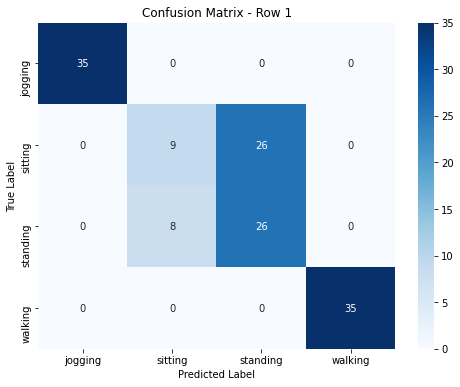

Row 2 Confusion Matrix:
[[34  0  0  0]
 [ 0 31  3  0]
 [ 0 11 23  0]
 [ 0  0  0 34]]



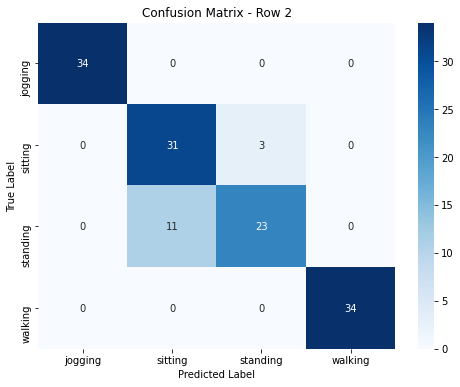

Row 3 Confusion Matrix:
[[34  0  0  0]
 [ 0 34  0  0]
 [ 0  2 32  0]
 [ 0  0  0 34]]



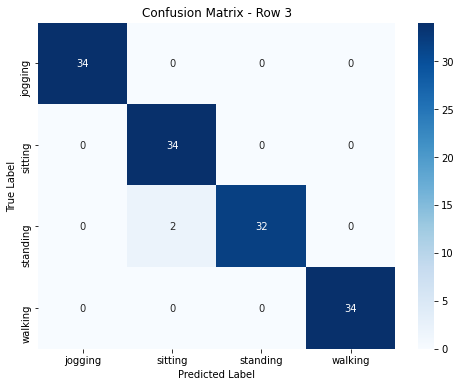

Row 4 Confusion Matrix:
[[34  0  0  0]
 [ 0 29  5  0]
 [ 0  3 31  0]
 [ 0  0  0 34]]



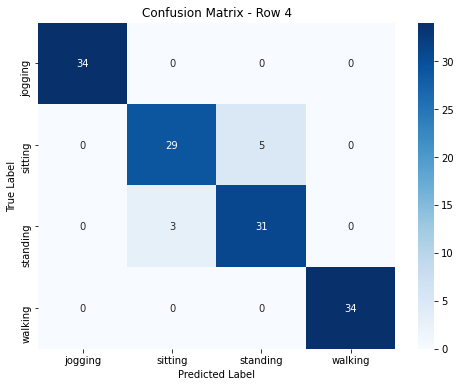

Row 5 Confusion Matrix:
[[30  0  1  1]
 [ 0 34  0  0]
 [ 0 13 21  0]
 [ 0  0  0 34]]



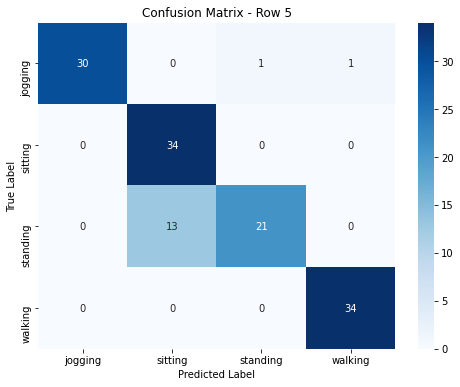

Row 6 Confusion Matrix:
[[34  0  0  0]
 [ 0 33  1  0]
 [ 0 18 12  0]
 [ 0  0  0 34]]



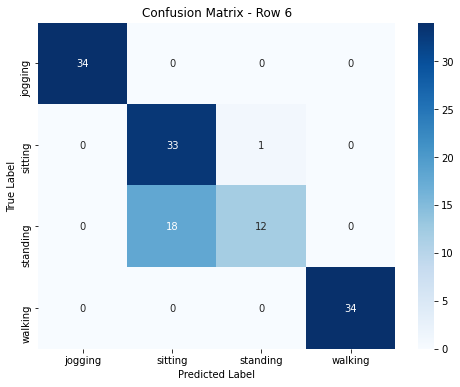

Row 7 Confusion Matrix:
[[29  0  0  6]
 [ 0 26  9  0]
 [ 0  0 35  0]
 [ 0  0  0 35]]



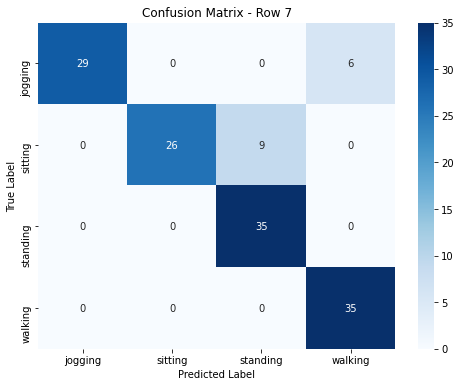

Row 8 Confusion Matrix:
[[34  0  0  0]
 [ 0 20 14  0]
 [ 0  5 29  0]
 [ 0  0  0 34]]



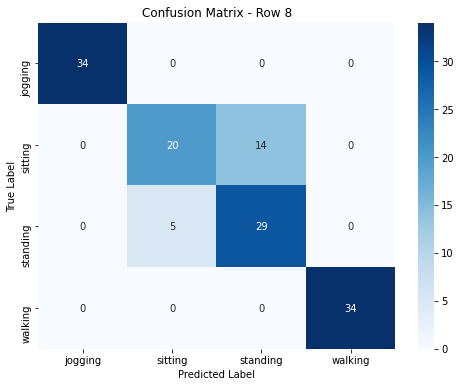

Row 9 Confusion Matrix:
[[33  1  0  0]
 [ 0 12 22  0]
 [ 0  0 34  0]
 [ 0  1  0 33]]



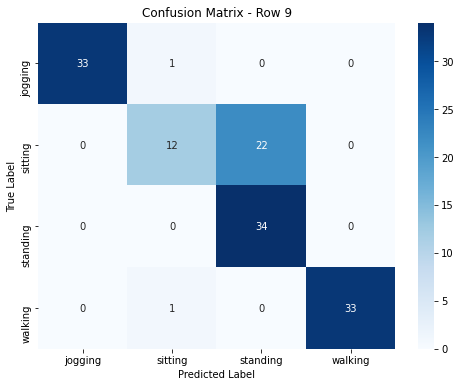

Row 10 Confusion Matrix:
[[34  0  0  0]
 [ 0 34  0  0]
 [ 0  6 28  0]
 [ 0  0  0 34]]



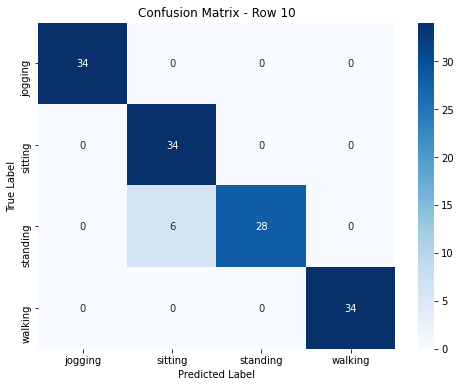

Row 11 Confusion Matrix:
[[34  0  0  0]
 [ 0 33  1  0]
 [ 0  4 30  0]
 [ 0  0  0 34]]



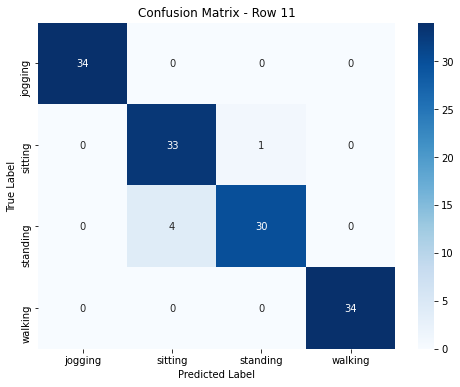

Row 12 Confusion Matrix:
[[34  0  0  0]
 [ 0 21 13  0]
 [ 0  7 25  0]
 [ 0  0  0 34]]



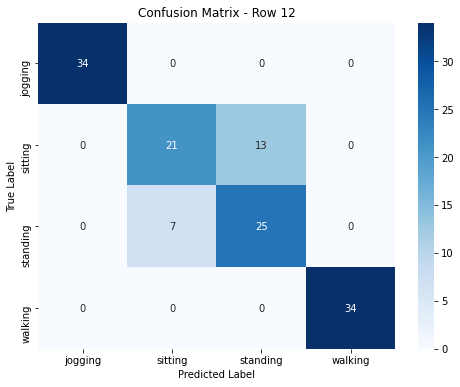

Row 13 Confusion Matrix:
[[34  0  0  0]
 [ 0 34  0  0]
 [ 0  4 30  0]
 [ 0  0  0 34]]



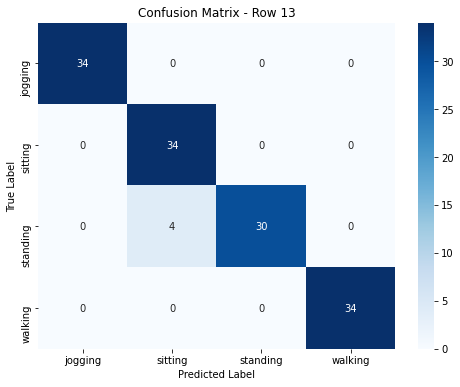

Row 14 Confusion Matrix:
[[34  0  0  0]
 [ 0 32  2  0]
 [ 0 11 23  0]
 [ 0  0  0 34]]



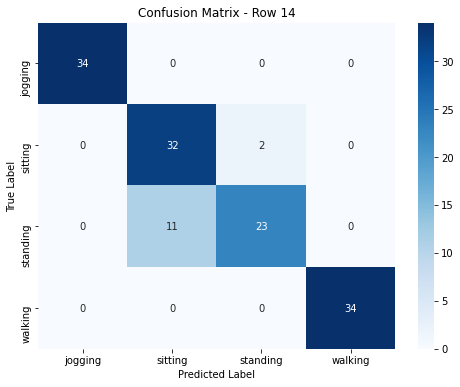

Row 15 Confusion Matrix:
[[34  0  0  0]
 [ 0 28  6  0]
 [ 0  0 31  3]
 [ 0  0  1 33]]



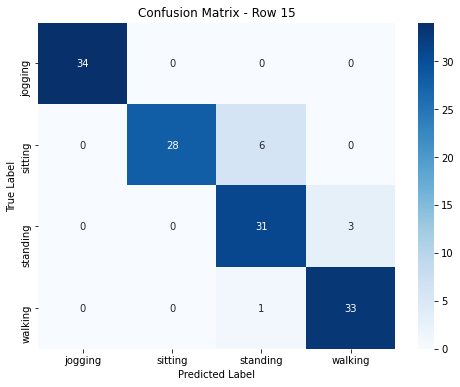

Row 16 Confusion Matrix:
[[34  0  0  0]
 [ 0 22 12  0]
 [ 0 13 21  0]
 [ 0  0  0 34]]



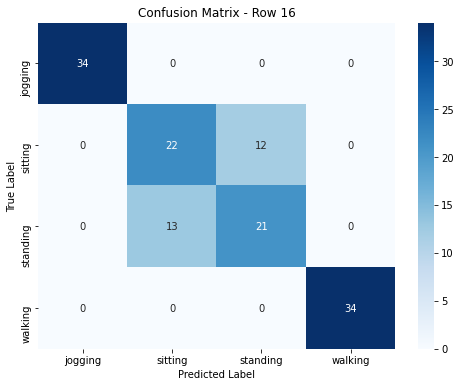

Row 17 Confusion Matrix:
[[33  0  0  0]
 [ 0 23 10  1]
 [ 0 16 18  0]
 [ 0  0  0 34]]



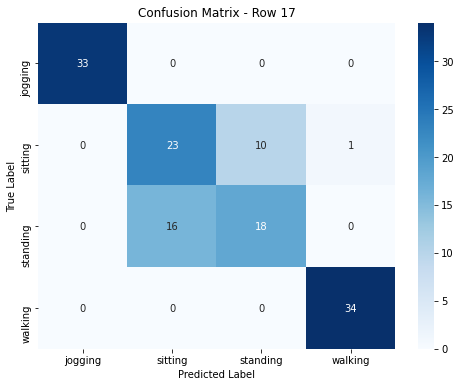

Row 18 Confusion Matrix:
[[34  0  0  0]
 [ 0 18 16  0]
 [ 0  0 34  0]
 [ 0  0  0 34]]



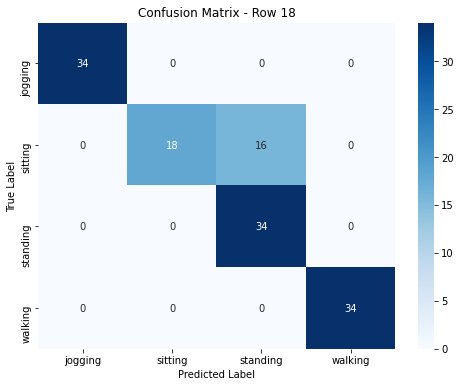

Row 19 Confusion Matrix:
[[34  0  0  0]
 [ 0 12 22  0]
 [ 0  0 34  0]
 [ 0  0  0 34]]



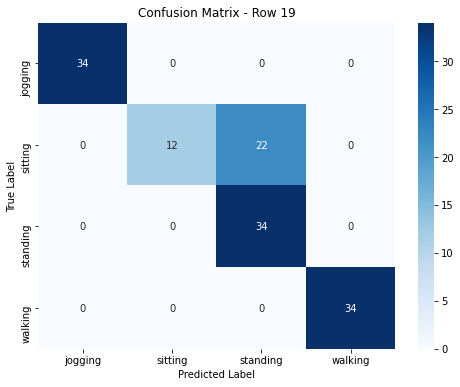

Row 20 Confusion Matrix:
[[34  0  0  0]
 [ 0 33  1  0]
 [ 0  8 26  0]
 [ 0  0  0 34]]



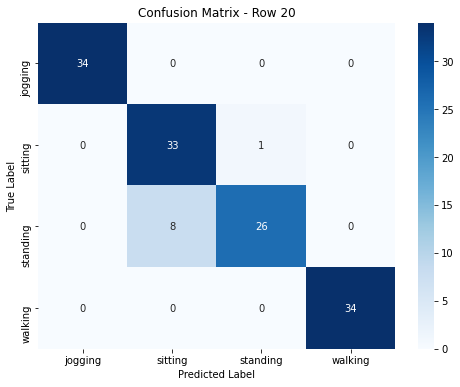

Row 21 Confusion Matrix:
[[35  0  0  0]
 [ 0 27  8  0]
 [ 0  1 33  0]
 [ 0  0  0 35]]



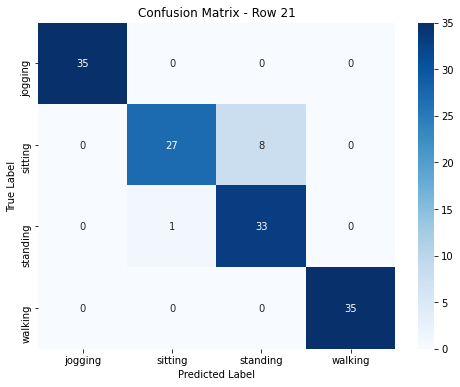

Row 22 Confusion Matrix:
[[34  0  0  0]
 [ 0 22 12  0]
 [ 0  6 28  0]
 [ 0  0  0 34]]



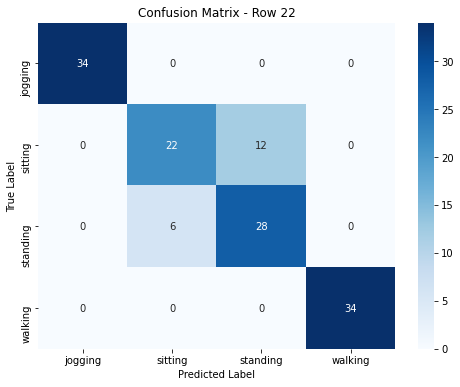

Row 23 Confusion Matrix:
[[33  0  1  0]
 [ 0 28  6  0]
 [ 0  2 31  1]
 [ 0  0  1 33]]



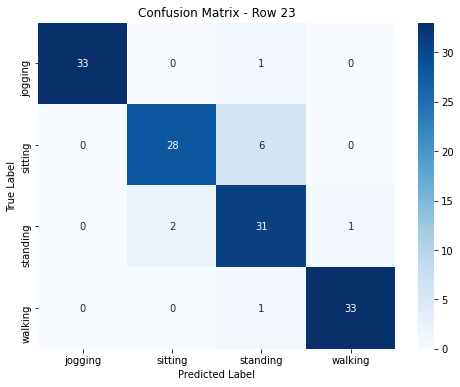

Row 24 Confusion Matrix:
[[33  0  0  1]
 [ 0 11 12  0]
 [ 0  3 26  0]
 [ 0  0  0 34]]



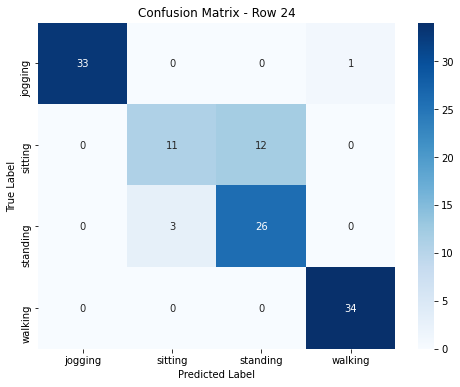

Row 25 Confusion Matrix:
[[34  0  0  0]
 [ 0 31  1  0]
 [ 0 19 15  0]
 [ 0  0  0 34]]



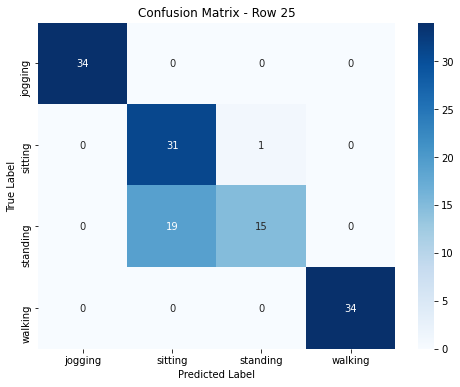

Row 26 Confusion Matrix:
[[34  0  0  0]
 [ 0 29  5  0]
 [ 0 16 18  0]
 [ 0  0  0 34]]



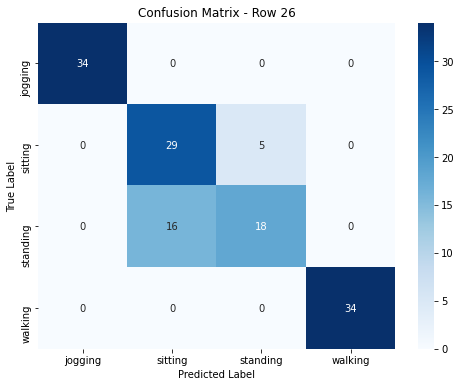

Row 27 Confusion Matrix:
[[34  0  0  0]
 [ 0 34  0  0]
 [ 0 13 21  0]
 [ 0  0  0 34]]



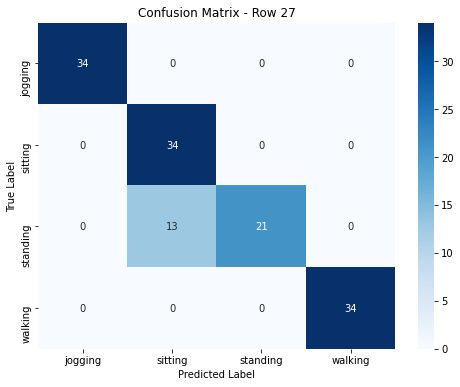

Row 28 Confusion Matrix:
[[34  0  0  0]
 [ 0 33  1  0]
 [ 0 19 15  0]
 [ 0  0  0 34]]



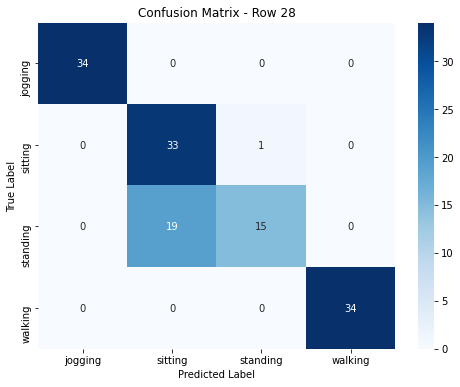

Row 29 Confusion Matrix:
[[31  0  0  0]
 [ 0 19 15  0]
 [ 0  7 27  0]
 [ 0  0  0 34]]



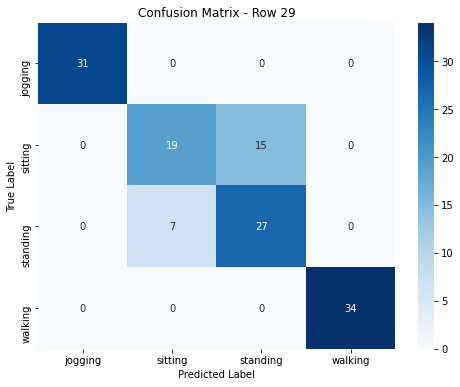

Row 30 Confusion Matrix:
[[34  0  0  0]
 [ 0 32  2  0]
 [ 0  6 28  0]
 [ 0  0  0 34]]



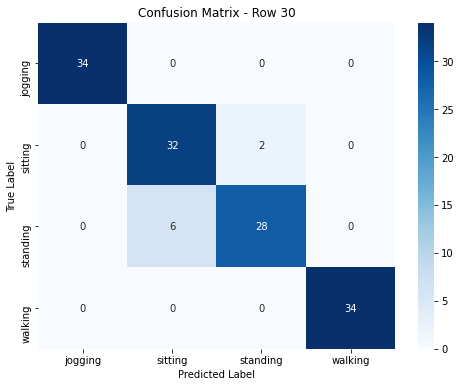

Row 31 Confusion Matrix:
[[33  1  0  0]
 [ 0 19 15  0]
 [ 0 10 22  0]
 [ 0  0  0 34]]



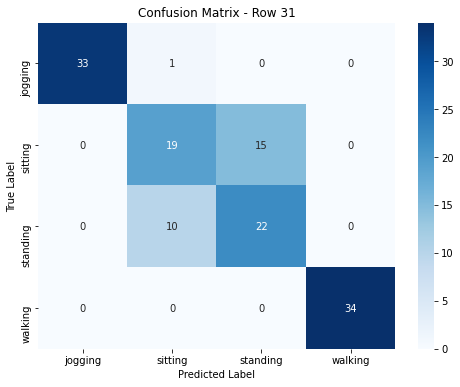

Row 32 Confusion Matrix:
[[34  0  0  0]
 [ 0 23 11  0]
 [ 0 21 13  0]
 [ 0  0  0 34]]



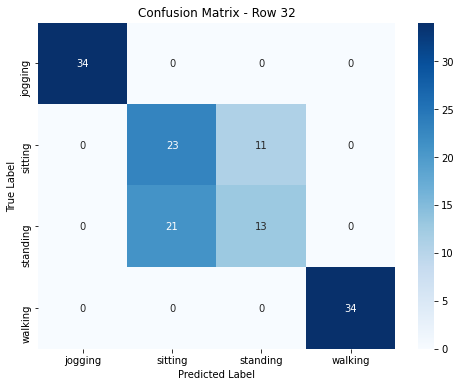

Row 33 Confusion Matrix:
[[35  0  0  0]
 [ 2 31  1  0]
 [ 0 24 11  0]
 [ 0  0  0 35]]



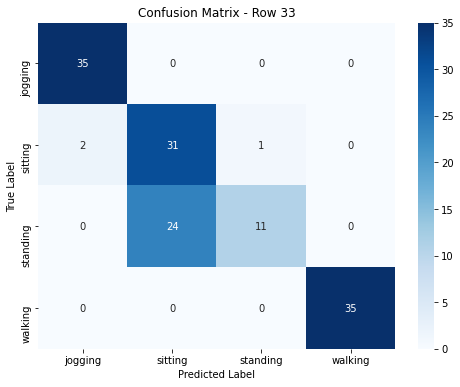

Row 34 Confusion Matrix:
[[34  0  0  0]
 [ 0 21 13  0]
 [ 0  5 29  0]
 [ 0  0  0 34]]



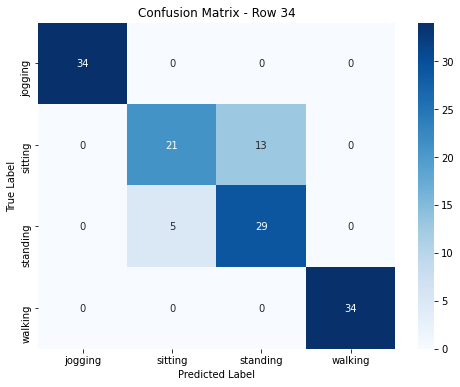

Row 35 Confusion Matrix:
[[34  0  0  0]
 [ 0 14 20  0]
 [ 0  0 34  0]
 [ 0  0  0 34]]



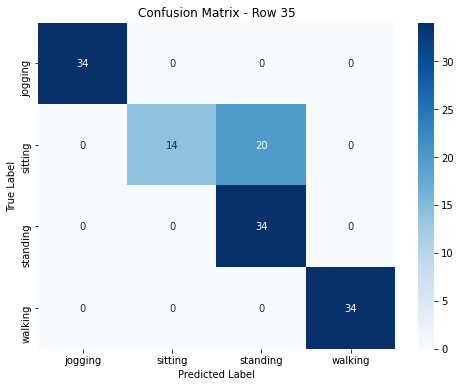

Row 36 Confusion Matrix:
[[34  0  0  0]
 [ 0 27  7  0]
 [ 0  2 32  0]
 [ 0  0  0 34]]



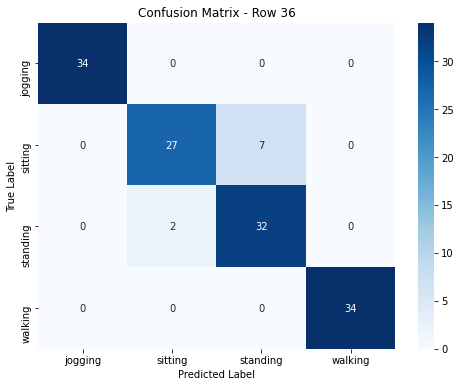

Row 37 Confusion Matrix:
[[34  0  0  0]
 [ 0 32  2  0]
 [ 0  8 26  0]
 [ 0  0  0 34]]



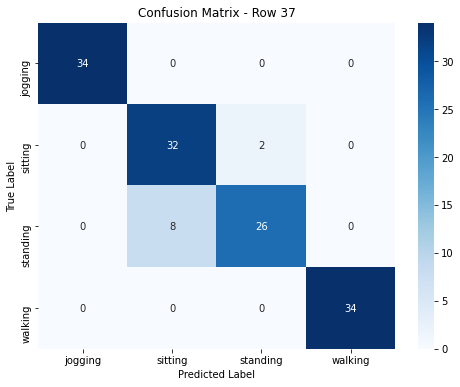

Row 38 Confusion Matrix:
[[34  0  0  0]
 [ 0 11 23  0]
 [ 0  0 34  0]
 [ 0  0  0 34]]



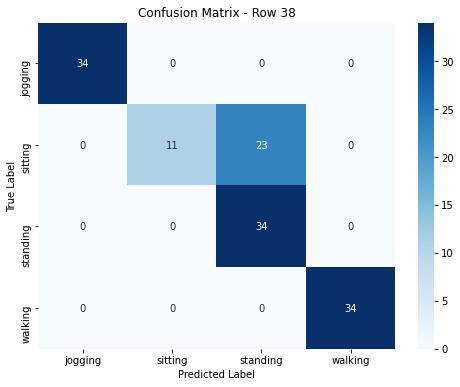

Row 39 Confusion Matrix:
[[34  0  0  0]
 [ 0 34  0  0]
 [ 0 17 17  0]
 [ 0  0  0 34]]



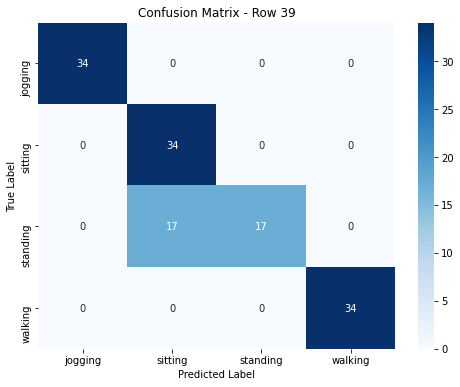

Row 40 Confusion Matrix:
[[34  0  0  0]
 [ 0 21 13  0]
 [ 0  7 27  0]
 [ 1  0  0 24]]



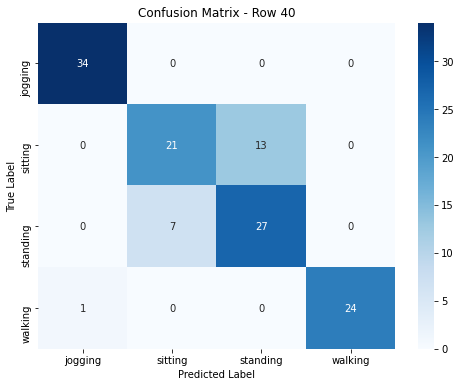

Row 41 Confusion Matrix:
[[34  0  0  0]
 [ 0 33  1  0]
 [ 0  3 31  0]
 [ 0  0  0 34]]



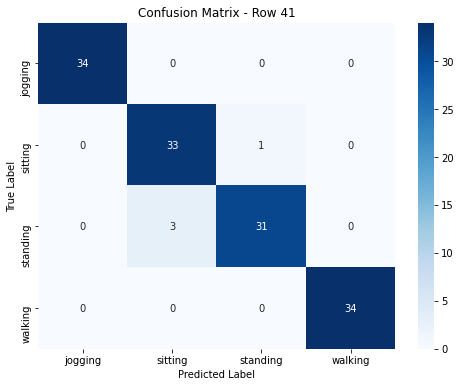

Row 42 Confusion Matrix:
[[34  0  0  1]
 [ 0 31  3  0]
 [ 0 11 24  0]
 [ 0  0  0 35]]



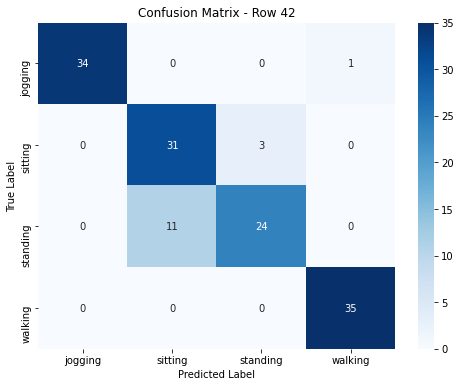

Row 43 Confusion Matrix:
[[34  0  0  0]
 [ 0 27  7  0]
 [ 0  3 31  0]
 [ 0  0  0 34]]



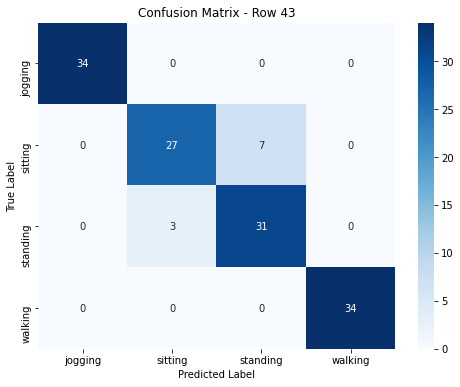

Row 44 Confusion Matrix:
[[34  0  0  0]
 [ 0 27  7  0]
 [ 0  2 32  0]
 [ 0  0  0 34]]



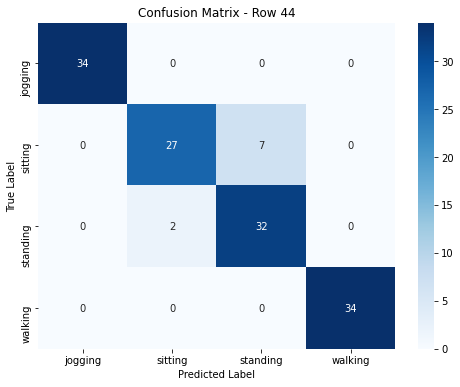

Row 45 Confusion Matrix:
[[34  0  0  0]
 [ 0 17 17  0]
 [ 0  0 34  0]
 [ 0  0  0 34]]



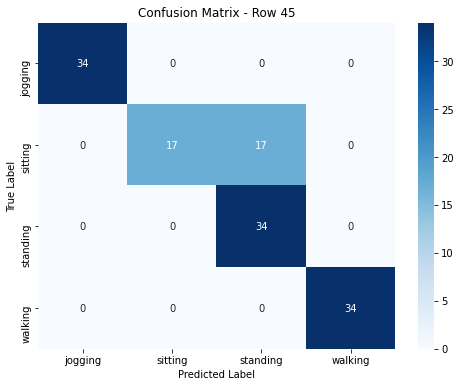

Row 46 Confusion Matrix:
[[33  0  0  1]
 [ 0 16  7  0]
 [ 0  2 27  0]
 [ 0  0  0 34]]



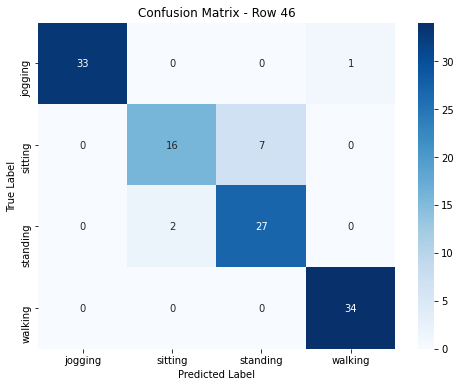

Row 47 Confusion Matrix:
[[35  0  0  0]
 [ 0 35  0  0]
 [ 0 12 23  0]
 [ 0  0  0 35]]



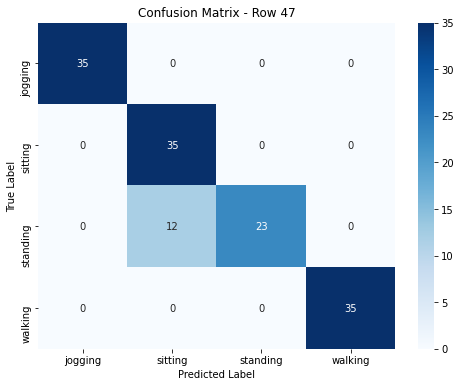

Row 48 Confusion Matrix:
[[34  0  0  0]
 [ 0 17 17  0]
 [ 0  1 33  0]
 [ 0  0  0 34]]



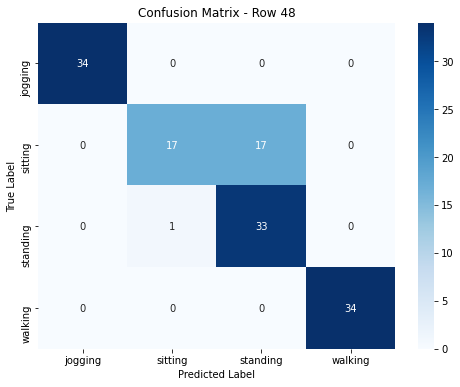

Row 49 Confusion Matrix:
[[32  0  0  2]
 [ 0 15 19  0]
 [ 0  0 34  0]
 [ 0  2  0 32]]



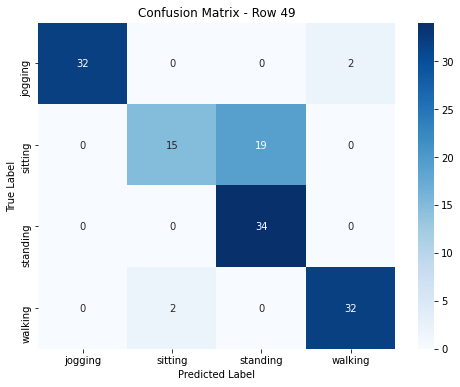

Row 50 Confusion Matrix:
[[34  0  0  0]
 [ 0 31  3  0]
 [ 0  8 26  0]
 [ 0  0  0 25]]



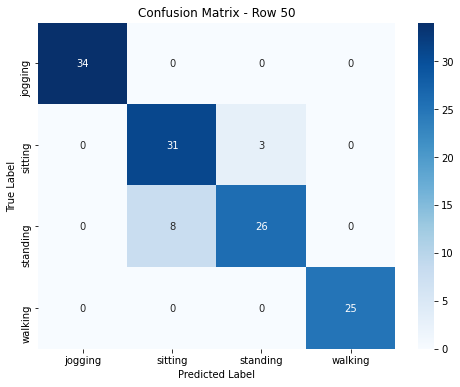

In [1]:
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast  # To safely parse confusion matrix from CSV (if stored as a string)

def visualize_confusion_matrices(folder_path):
    # 1️⃣ Load label mapping
    label_mapping_path = os.path.join(folder_path, "label_mapping.json")
    if not os.path.exists(label_mapping_path):
        raise FileNotFoundError(f"label_mapping.json not found in {folder_path}")

    with open(label_mapping_path, "r") as f:
        label_mapping = json.load(f)
    
    labels = list(label_mapping.keys())
    print(f"Labels: {labels}")
    # 2️⃣ Find CSV file with the longest name
    csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]
    if not csv_files:
        raise FileNotFoundError("No CSV files found in the folder.")

    scores_csv = max(csv_files, key=len)
    csv_path = os.path.join(folder_path, scores_csv)
    
    
    # 3️⃣ Read CSV and extract confusion matrices
    df = pd.read_csv(csv_path)
    if "confusion_matrix" not in df.columns:
        raise KeyError("CSV file does not contain 'confusion_matrix' column.")
    # 4️⃣ Calculate the mean and std for other columns
    other_columns = df.columns[df.columns != "confusion_matrix"]  # Exclude 'confusion_matrix'
    for column in other_columns:
        mean_value = df[column].mean()
        std_value = df[column].std()
        print(f"Column '{column}' - Mean: {mean_value:.2f}, Std: {std_value:.2f}")
    
    for i, row in df.iterrows():
        try:
            raw_conf_matrix = row["confusion_matrix"]
            # print(f"Row {i+1} Confusion Matrix (raw):\n{raw_conf_matrix}\n")  # Debugging print
            # Clean up the string and convert to list of lists
            cleaned = raw_conf_matrix.replace('[', '').replace(']', '')
            rows = [list(map(int, row.split())) for row in cleaned.split()]

            # Convert to numpy array
            conf_matrix = np.array(rows).reshape(len(labels), len(labels))
            # Clean and format the confusion matrix string
            # conf_matrix_str = raw_conf_matrix.replace("\n", " ")  # Remove newlines
            # conf_matrix_str = " ".join(conf_matrix_str.split())  # Remove extra spaces
            print(f"Row {i+1} Confusion Matrix:\n{conf_matrix}\n")  # Debugging print
            # conf_matrix = ast.literal_eval(conf_matrix_str)  # Convert string to list
            # conf_matrix = np.array(conf_matrix)

            # 4️⃣ Plot confusion matrix
            plt.figure(figsize=(8, 6))
            sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                        xticklabels=labels, yticklabels=labels)

            plt.xlabel("Predicted Label")
            plt.ylabel("True Label")
            plt.title(f"Confusion Matrix - Row {i+1}")
            plt.show()
        
        except Exception as e:
            print(f"Skipping row {i+1} due to error: {e}")

# Usage Example
folder_path = "/home/hossein/ssl-wearables/data/reports/2025-02-18_19-32"
visualize_confusion_matrices(folder_path)

### Cross dataset confusion matrix

Pretrained Model Labels: ['jogging', 'sitting', 'standing', 'walking']
Evaluation Dataset Labels: ['cycling', 'sedentary_lying', 'sedentary_sitting_other', 'sedentary_sitting_transport', 'upright_standing', 'upright_stepping_low', 'upright_stepping_moderate', 'upright_stepping_vigorous']
Processing /home/hossein/ssl-wearables/data/reports/2025-02-19_10-00/p3.csv
   Y_test  Y_test_pred
0       2            1
1       2            1
2       5            1
3       5            1
4       6            1
Y_test: ['sedentary_sitting_other' 'upright_stepping_low'
 'upright_stepping_moderate' 'upright_standing'
 'sedentary_sitting_transport' 'sedentary_lying']
Y_test_pred: ['sitting' 'walking' 'standing']
Pivot Table:
Y_test_pred                  sitting  standing  walking
Y_test                                                 
sedentary_lying                   96         0        0
sedentary_sitting_other          578        39        0
sedentary_sitting_transport       27        56        0
up

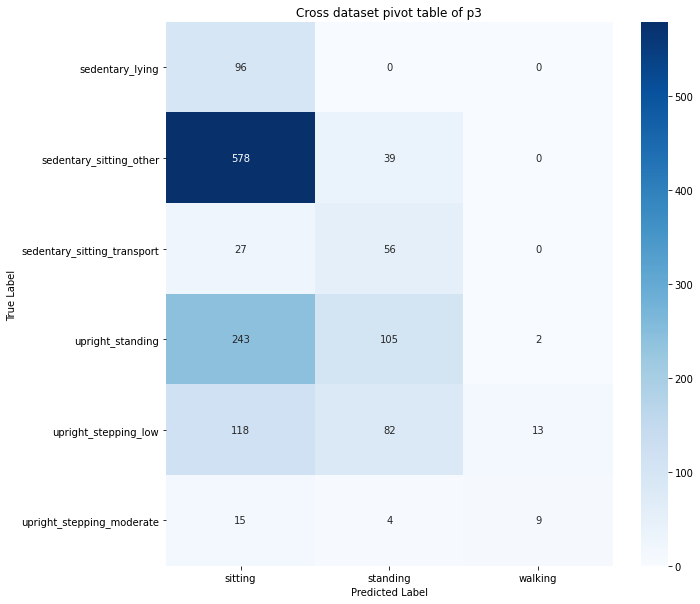

Processing /home/hossein/ssl-wearables/data/reports/2025-02-19_10-00/p9.csv
   Y_test  Y_test_pred
0       6            3
1       5            3
2       5            3
3       6            3
4       5            1
Y_test: ['upright_stepping_moderate' 'upright_stepping_low'
 'sedentary_sitting_other' 'upright_standing'
 'sedentary_sitting_transport' 'sedentary_lying']
Y_test_pred: ['walking' 'sitting' 'standing']
Pivot Table:
Y_test_pred                  sitting  standing  walking
Y_test                                                 
sedentary_lying                   33         1        0
sedentary_sitting_other          955        89        0
sedentary_sitting_transport      188       401        1
upright_standing                 142        58        0
upright_stepping_low              52        32       17
upright_stepping_moderate          8         1        9



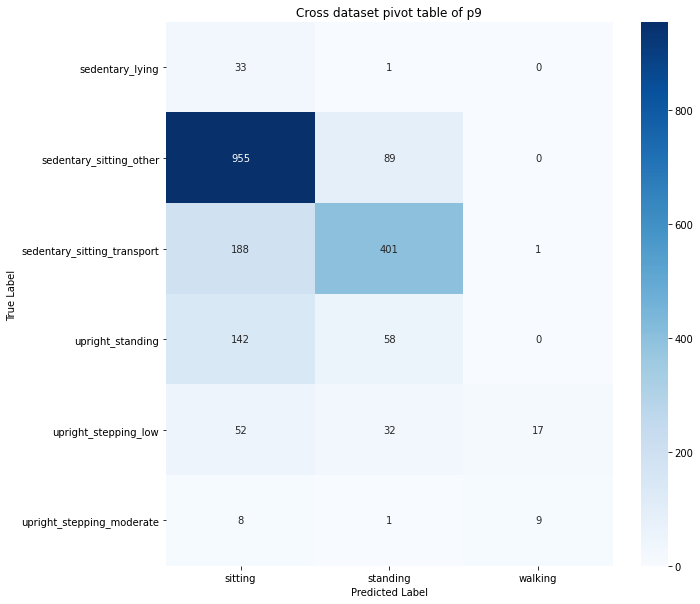

Processing /home/hossein/ssl-wearables/data/reports/2025-02-19_10-00/p2.csv
   Y_test  Y_test_pred
0       4            1
1       4            1
2       4            1
3       2            3
4       2            1
Y_test: ['upright_standing' 'sedentary_sitting_other' 'upright_stepping_low'
 'upright_stepping_moderate' 'sedentary_lying'
 'sedentary_sitting_transport']
Y_test_pred: ['sitting' 'walking' 'standing']
Pivot Table:
Y_test_pred                  sitting  standing  walking
Y_test                                                 
sedentary_lying                  124         0        0
sedentary_sitting_other          543        37        1
sedentary_sitting_transport       10        41        0
upright_standing                 385       141        4
upright_stepping_low              17        10        4
upright_stepping_moderate         15         0       19



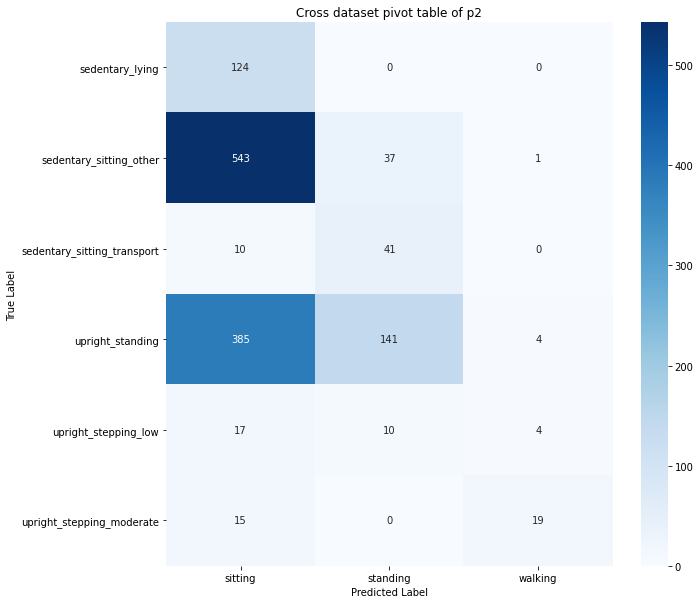

Processing /home/hossein/ssl-wearables/data/reports/2025-02-19_10-00/p12.csv
   Y_test  Y_test_pred
0       2            1
1       2            1
2       2            1
3       2            1
4       2            1
Y_test: ['sedentary_sitting_other' 'upright_standing'
 'sedentary_sitting_transport' 'upright_stepping_low']
Y_test_pred: ['sitting' 'standing' 'walking']
Pivot Table:
Y_test_pred                  sitting  standing  walking
Y_test                                                 
sedentary_sitting_other         1122        75        1
sedentary_sitting_transport       12        12        0
upright_standing                 204        33        3
upright_stepping_low              17         9        5



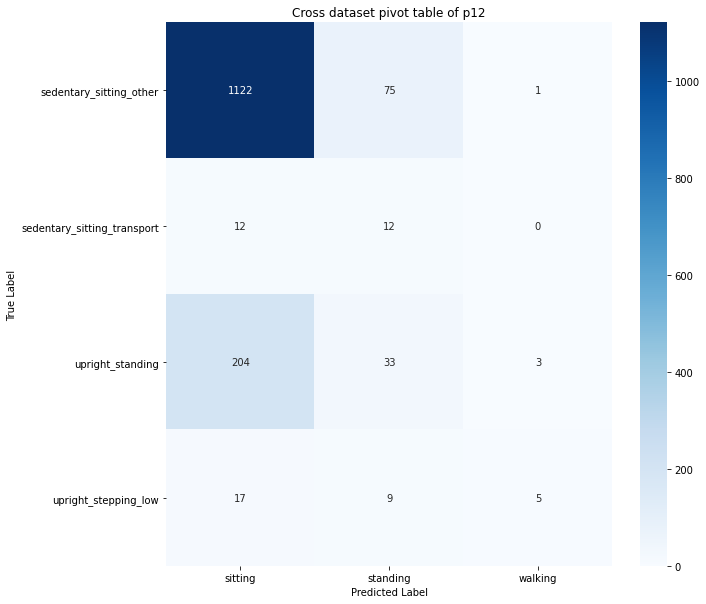

Processing /home/hossein/ssl-wearables/data/reports/2025-02-19_10-00/p8.csv
   Y_test  Y_test_pred
0       4            2
1       4            1
2       4            1
3       4            1
4       4            1
Y_test: ['upright_standing' 'sedentary_sitting_other' 'upright_stepping_low'
 'upright_stepping_moderate' 'sedentary_sitting_transport']
Y_test_pred: ['standing' 'sitting' 'walking' 'jogging']
Pivot Table:
Y_test_pred                  jogging  sitting  standing  walking
Y_test                                                          
sedentary_sitting_other            1      337        53        4
sedentary_sitting_transport        0       44        79        0
upright_standing                   0      157        56        0
upright_stepping_low               0       26        23        4
upright_stepping_moderate          2       47        27       37



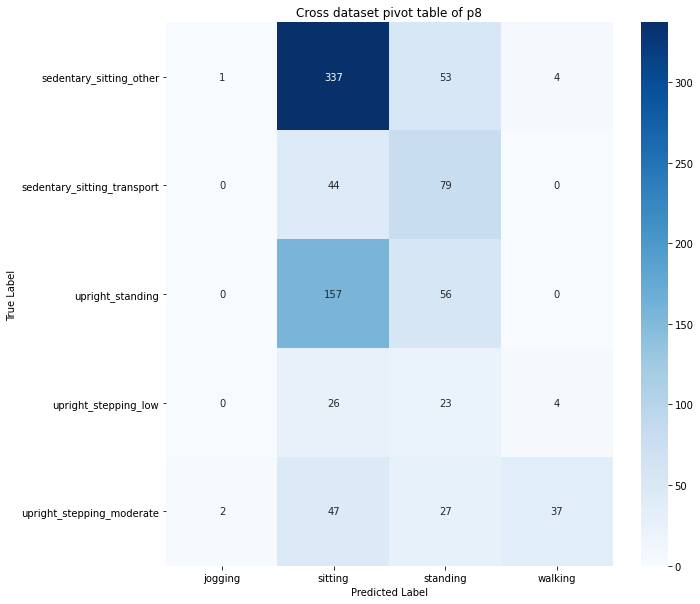

Processing /home/hossein/ssl-wearables/data/reports/2025-02-19_10-00/p1.csv
   Y_test  Y_test_pred
0       4            1
1       4            1
2       5            1
3       4            2
4       4            1
Y_test: ['upright_standing' 'upright_stepping_low' 'sedentary_sitting_transport'
 'sedentary_sitting_other' 'upright_stepping_moderate']
Y_test_pred: ['sitting' 'standing' 'walking' 'jogging']
Pivot Table:
Y_test_pred                  jogging  sitting  standing  walking
Y_test                                                          
sedentary_sitting_other            0      178        12        0
sedentary_sitting_transport        0       88       245        0
upright_standing                   1      200        59        3
upright_stepping_low               0       94        20        4
upright_stepping_moderate          0        5         0        0



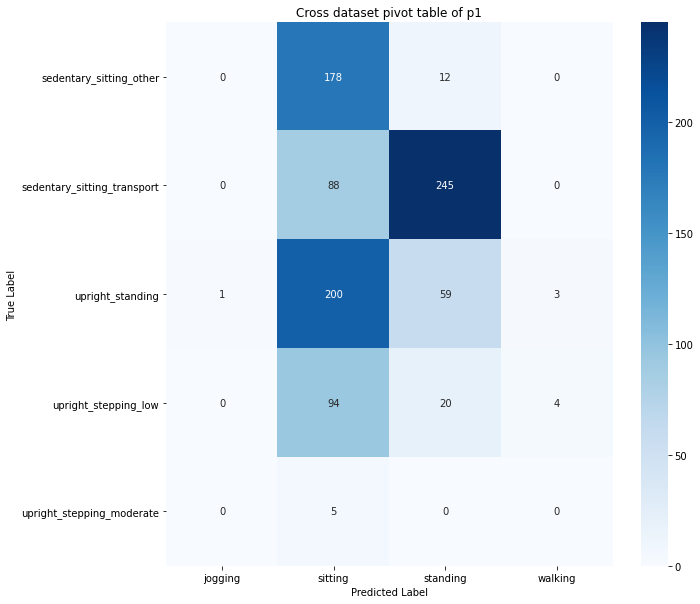

Processing /home/hossein/ssl-wearables/data/reports/2025-02-19_10-00/p10.csv
   Y_test  Y_test_pred
0       4            1
1       4            1
2       5            1
3       5            1
4       2            1
Y_test: ['upright_standing' 'upright_stepping_low' 'sedentary_sitting_other'
 'sedentary_sitting_transport']
Y_test_pred: ['sitting' 'standing' 'walking']
Pivot Table:
Y_test_pred                  sitting  standing  walking
Y_test                                                 
sedentary_sitting_other          803         7        2
sedentary_sitting_transport        6         3        0
upright_standing                 112         9       16
upright_stepping_low              28         4       37



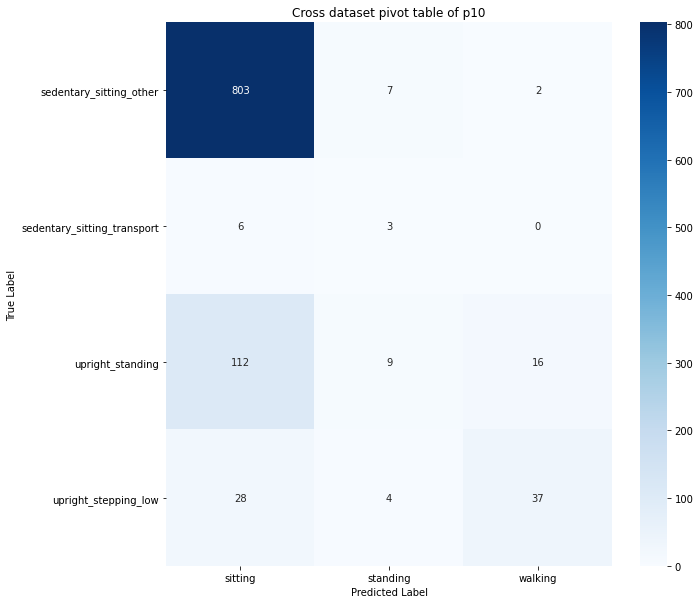

Processing /home/hossein/ssl-wearables/data/reports/2025-02-19_10-00/p13.csv
   Y_test  Y_test_pred
0       2            1
1       2            1
2       2            1
3       2            1
4       2            1
Y_test: ['sedentary_sitting_other' 'cycling' 'sedentary_lying'
 'upright_stepping_low' 'upright_standing' 'sedentary_sitting_transport'
 'upright_stepping_moderate' 'upright_stepping_vigorous']
Y_test_pred: ['sitting' 'standing' 'walking' 'jogging']
Pivot Table:
Y_test_pred                  jogging  sitting  standing  walking
Y_test                                                          
cycling                            0        1        69        0
sedentary_lying                    0       61         0        0
sedentary_sitting_other            0      931        59        2
sedentary_sitting_transport        0       12        11        0
upright_standing                   0      202        70        2
upright_stepping_low               0       36        11        5
up

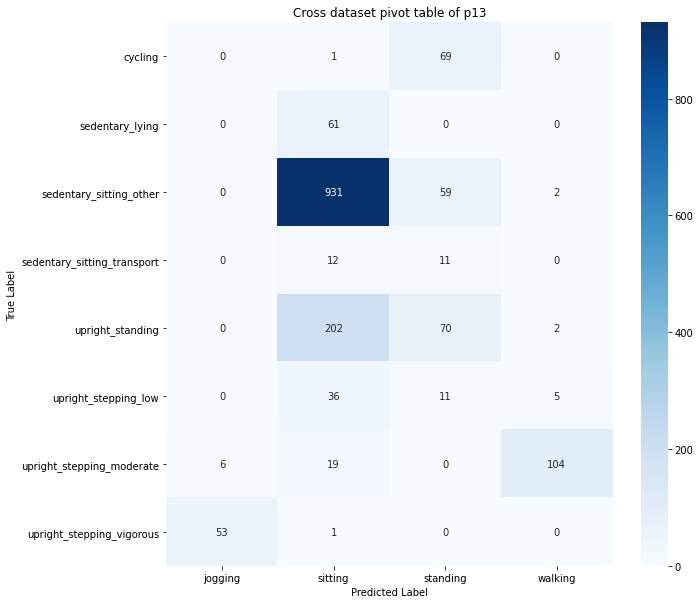

Processing /home/hossein/ssl-wearables/data/reports/2025-02-19_10-00/p6.csv
   Y_test  Y_test_pred
0       2            1
1       2            1
2       2            1
3       2            1
4       2            1
Y_test: ['sedentary_sitting_other' 'upright_standing' 'upright_stepping_low'
 'sedentary_sitting_transport' 'upright_stepping_moderate']
Y_test_pred: ['sitting' 'standing' 'walking']
Pivot Table:
Y_test_pred                  sitting  standing  walking
Y_test                                                 
sedentary_sitting_other         1399        32        3
sedentary_sitting_transport      100       135        1
upright_standing                1221       147       29
upright_stepping_low             119        67       22
upright_stepping_moderate         20         7      102



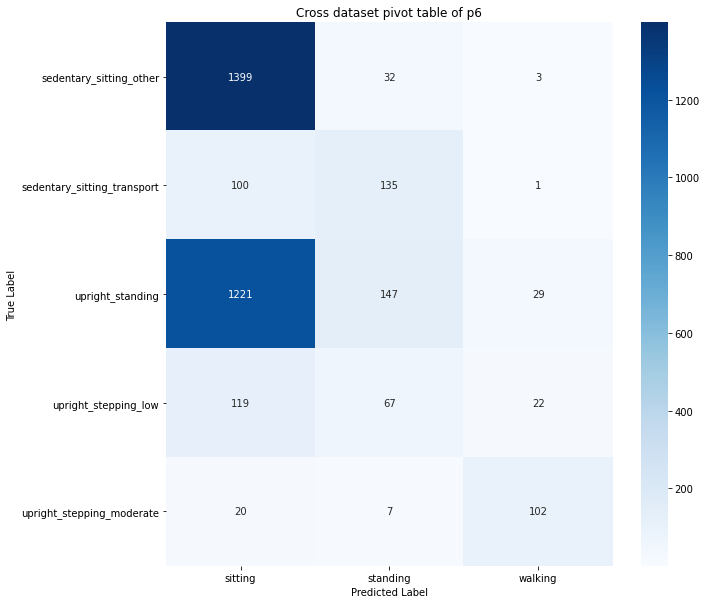

Processing /home/hossein/ssl-wearables/data/reports/2025-02-19_10-00/p7.csv
   Y_test  Y_test_pred
0       2            1
1       2            1
2       2            1
3       2            1
4       2            1
Y_test: ['sedentary_sitting_other' 'upright_standing' 'upright_stepping_low'
 'upright_stepping_moderate' 'sedentary_sitting_transport']
Y_test_pred: ['sitting' 'standing' 'walking' 'jogging']
Pivot Table:
Y_test_pred                  jogging  sitting  standing  walking
Y_test                                                          
sedentary_sitting_other            0     1163        37        4
sedentary_sitting_transport        0       15        50        0
upright_standing                   0      143        49        0
upright_stepping_low               0       16         5        0
upright_stepping_moderate         15       84         2       37



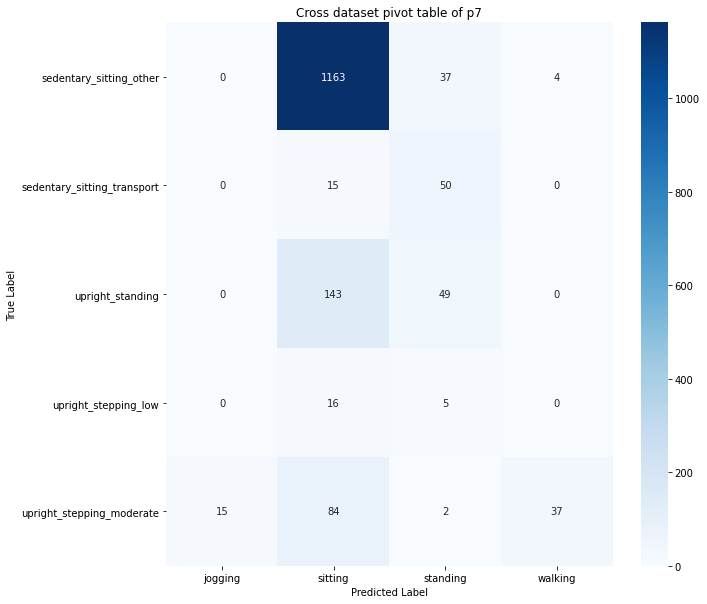

Processing /home/hossein/ssl-wearables/data/reports/2025-02-19_10-00/p5.csv
   Y_test  Y_test_pred
0       4            2
1       4            2
2       4            1
3       4            1
4       4            1
Y_test: ['upright_standing' 'sedentary_sitting_other' 'upright_stepping_moderate'
 'sedentary_sitting_transport' 'upright_stepping_low'
 'upright_stepping_vigorous']
Y_test_pred: ['standing' 'sitting' 'walking' 'jogging']
Pivot Table:
Y_test_pred                  jogging  sitting  standing  walking
Y_test                                                          
sedentary_sitting_other            0      512        15        0
sedentary_sitting_transport        0       38        76        0
upright_standing                   0      392        86        4
upright_stepping_low               0       35        11        4
upright_stepping_moderate          9       20         0       59
upright_stepping_vigorous          1        1         0        0



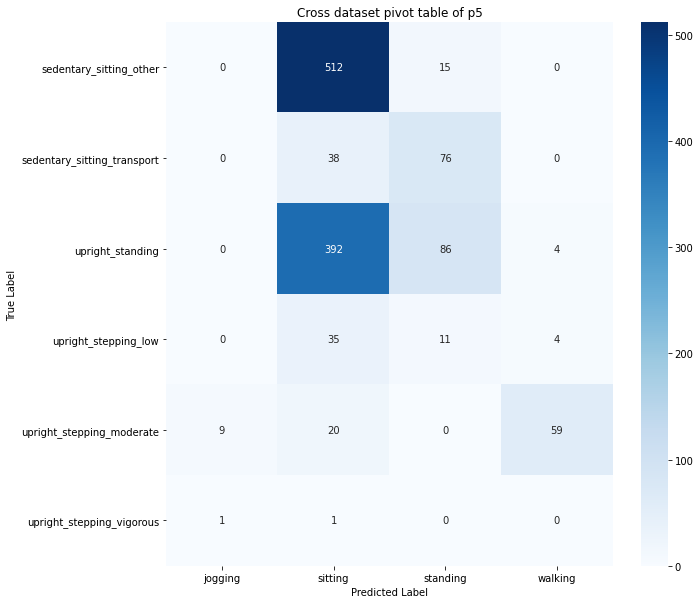

Processing /home/hossein/ssl-wearables/data/reports/2025-02-19_10-00/p4.csv
   Y_test  Y_test_pred
0       2            1
1       5            1
2       4            1
3       4            3
4       4            1
Y_test: ['sedentary_sitting_other' 'upright_stepping_low' 'upright_standing'
 'upright_stepping_moderate' 'cycling']
Y_test_pred: ['sitting' 'walking' 'standing' 'jogging']
Pivot Table:
Y_test_pred                jogging  sitting  standing  walking
Y_test                                                        
cycling                          0       10        39        2
sedentary_sitting_other          0      484         8        2
upright_standing                 1       61        13        2
upright_stepping_low             0       13         1        3
upright_stepping_moderate        0        6         0       38



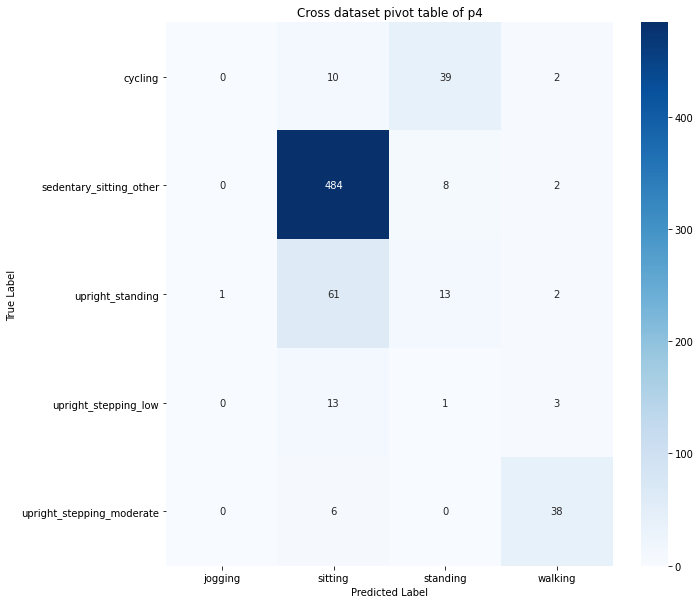

Processing /home/hossein/ssl-wearables/data/reports/2025-02-19_10-00/p11.csv
   Y_test  Y_test_pred
0       4            1
1       4            2
2       4            1
3       4            1
4       4            1
Y_test: ['upright_standing' 'upright_stepping_low' 'sedentary_sitting_other'
 'sedentary_sitting_transport']
Y_test_pred: ['sitting' 'standing' 'walking' 'jogging']
Pivot Table:
Y_test_pred                  jogging  sitting  standing  walking
Y_test                                                          
sedentary_sitting_other            0      387        32        0
sedentary_sitting_transport        0       20        55        0
upright_standing                   0      466       119        6
upright_stepping_low               1      102        66       20



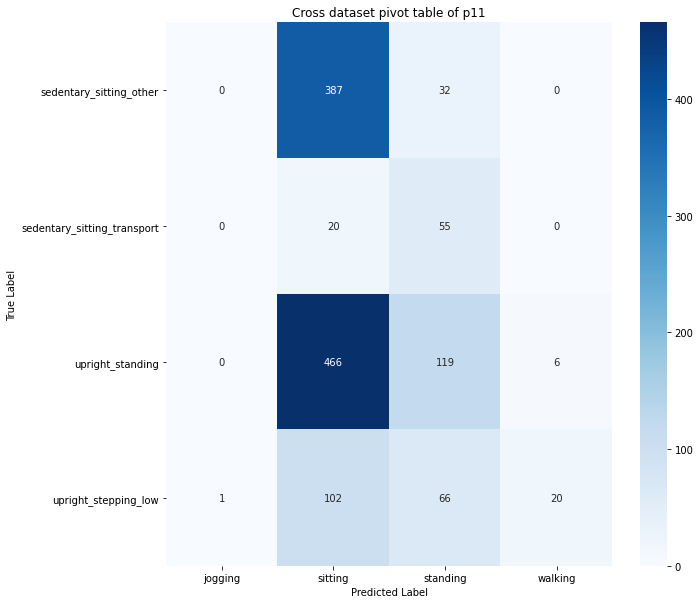

Pivot Table:
Y_test_pred                  jogging  sitting  standing  walking
Y_test                                                          
cycling                            0       11       108        2
sedentary_lying                    0      314         1        0
sedentary_sitting_other            1     9392       495       19
sedentary_sitting_transport        0      560      1164        2
upright_standing                   2     3928       945       71
upright_stepping_low               1      673       341      138
upright_stepping_moderate         32      239        41      414
upright_stepping_vigorous         54        2         0        0



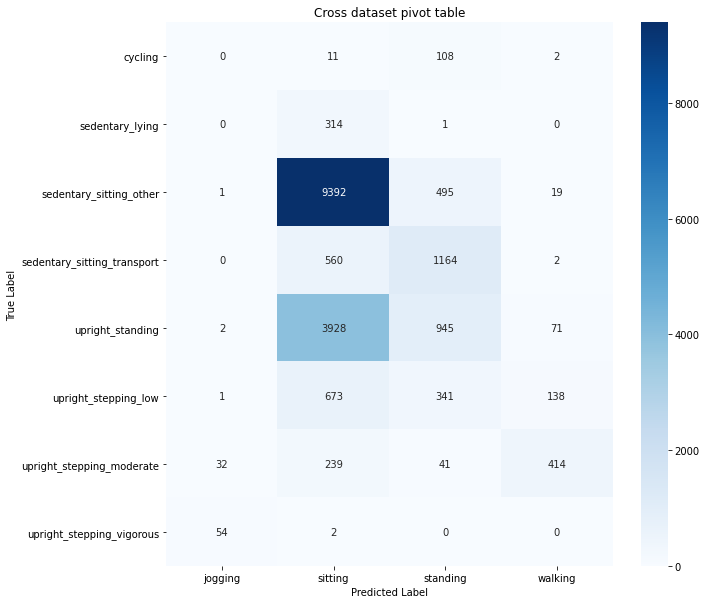

In [4]:
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def visualize_confusion_matrices_cross_dataset(folder_path, model_label_map_dir):
    # 1️⃣ Load Pretrained Model label mapping
    model_label_mapping_path = os.path.join(model_label_map_dir, "label_mapping.json")
    if not os.path.exists(model_label_mapping_path):
        raise FileNotFoundError(f"label_mapping.json not found in {model_label_map_dir}")
    with open(model_label_mapping_path, "r") as f:
        model_label_mapping = json.load(f)
    
    model_labels = list(model_label_mapping.keys())
    print(f"Pretrained Model Labels: {model_labels}")
    # 1️⃣ Load evaluation dataset label mapping
    label_mapping_path = os.path.join(folder_path, "eval_label_mapping.json")
    if not os.path.exists(label_mapping_path):
        raise FileNotFoundError(f"eval_label_mapping.json not found in {folder_path}")

    with open(label_mapping_path, "r") as f:
        label_mapping = json.load(f)
    
    labels = list(label_mapping.keys())
    print(f"Evaluation Dataset Labels: {labels}")
    # reverse the mapping
    label_mapping = {v: k for k, v in label_mapping.items()}
    model_label_mapping = {v: k for k, v in model_label_mapping.items()}
    # 2️⃣ Find CSV file with the longest name
    csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]
    if not csv_files:
        raise FileNotFoundError("No CSV files found in the folder.")
    
    
    csv_paths = [os.path.join(folder_path, csv_file) for csv_file in csv_files]
    for csv_path in csv_paths:
        # 3️⃣ Read CSV file and map Y_test,Y_test_pred to model labels
        print(f"Processing {csv_path}")
        df = pd.read_csv(csv_path)
        print(df.head())
        if "Y_test" not in df.columns or "Y_test_pred" not in df.columns:
            raise KeyError("CSV file does not contain 'Y_test' or 'Y_test_pred' columns.")
        df["Y_test"] = df["Y_test"].map(label_mapping) # Map to evaluation dataset labels
        df["Y_test_pred"] = df["Y_test_pred"].map(model_label_mapping) # Map to model labels
        print(f"Y_test: {df['Y_test'].unique()}")
        print(f"Y_test_pred: {df['Y_test_pred'].unique()}")
        # 4️⃣ Calculate the pivot table of true and predicted labels
        pivot_table = pd.pivot_table(df, index="Y_test", columns="Y_test_pred", aggfunc='size', fill_value=0)
        print(f"Pivot Table:\n{pivot_table}\n")
        
        # 5️⃣ Plot confusion matrix
        plt.figure(figsize=(10, 10))
        sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Blues")
                    # xticklabels=model_labels, yticklabels=labels)
        # 6️⃣ Show plot
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        participant = csv_path.split("/")[-1].split(".")[0]
        plt.title(f"Cross dataset pivot table of {participant}")
        plt.show()
    
    # combine all csv files and calculate the confusion matrix
    df = pd.concat([pd.read_csv(csv_path) for csv_path in csv_paths], ignore_index=True)
    if "Y_test" not in df.columns or "Y_test_pred" not in df.columns:
        raise KeyError("CSV file does not contain 'Y_test' or 'Y_test_pred' columns.")
    df["Y_test"] = df["Y_test"].map(label_mapping) # Map to evaluation dataset labels
    df["Y_test_pred"] = df["Y_test_pred"].map(model_label_mapping) # Map to model labels
   # 4️⃣ Calculate the pivot table
    pivot_table = pd.pivot_table(df, index="Y_test", columns="Y_test_pred", aggfunc='size', fill_value=0)
    print(f"Pivot Table:\n{pivot_table}\n")
    
    # 5️⃣ Plot pivot table
    plt.figure(figsize=(10, 10))
    sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Blues")
                # xticklabels=model_labels, yticklabels=labels)
    # 6️⃣ Show plot
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Cross dataset pivot table")
    plt.show()
    
    
    

# Usage Example
evaluation_result = "/home/hossein/ssl-wearables/data/reports/2025-02-19_10-00"
pretrained_model_label = "/home/hossein/ssl-wearables/data/reports/2025-02-18_19-32"
visualize_confusion_matrices_cross_dataset(evaluation_result, pretrained_model_label)


## Visualize Cross-dataset Confusion matrix (V2)

In [2]:
import sys
import os

# Add the parent directory of "src" to sys.path
sys.path.append(os.path.abspath("../data_parsing"))

from Dataset_Label_Mapper import DatasetLabelMapper

Pretrained Model Labels(ExtraSensory): ['cycling', 'sedentary_lying', 'sedentary_sitting_other', 'sedentary_sitting_transport', 'upright_standing', 'upright_stepping_low', 'upright_stepping_moderate', 'upright_stepping_vigorous']
Evaluation Dataset Labels(WISDM): ['sitting', 'standing', 'walking', 'jogging']
Reference Mapping(WISDM): {'sitting': 'Sitting', 'standing': 'Standing', 'walking': 'Stepping_Moderate', 'jogging': 'Stepping_Vigorous'}
Reference Mapping(ExtraSensory): {'sedentary_lying': 'Lying', 'sedentary_sitting_other': 'Sitting', 'sedentary_sitting_transport': 'Transport', 'upright_standing': 'Standing', 'upright_stepping_low': 'Stepping_Low', 'upright_stepping_moderate': 'Stepping_Moderate', 'upright_stepping_vigorous': 'Stepping_Vigorous', 'cycling': 'Cycling'}
label distribution on WISDM:
jogging     1563
walking     1560
sitting     1554
standing    1553
Name: Y_test, dtype: int64
Pivot Table:
Y_test_pred  cycling  sedentary_sitting_transport  upright_stepping_low  \
Y_t

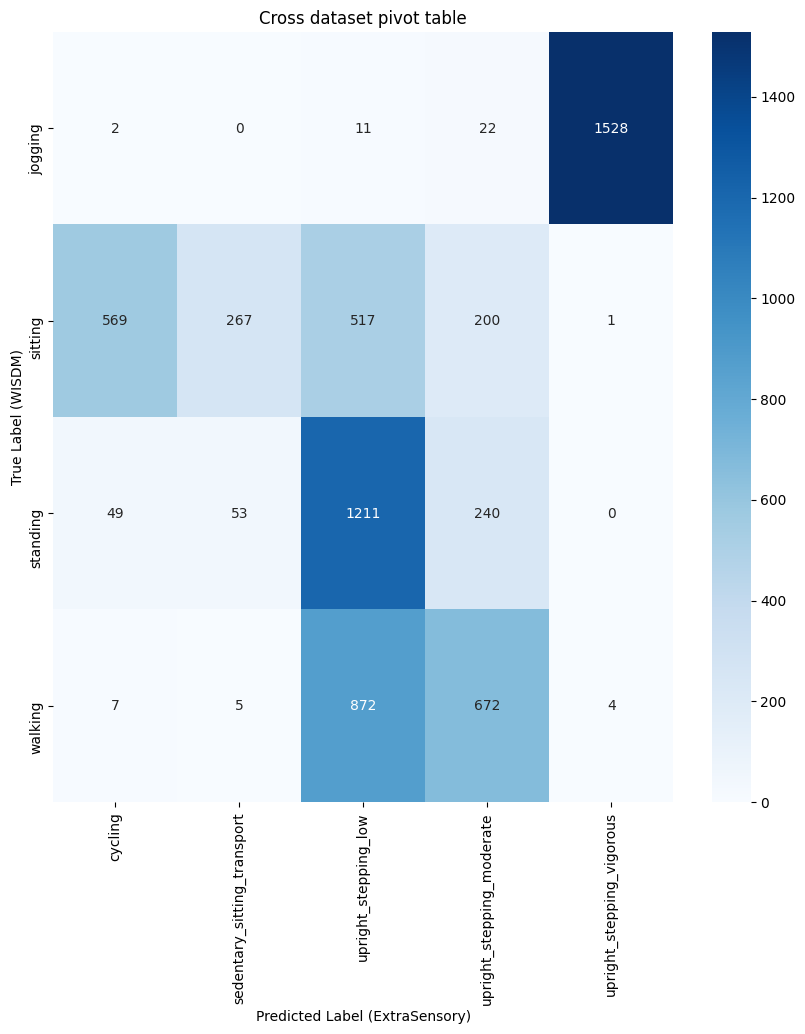

all_available_labels: ['sedentary_lying', 'sedentary_sitting_other', 'sedentary_sitting_transport', 'upright_standing', 'upright_stepping_low', 'upright_stepping_moderate', 'upright_stepping_vigorous', 'cycling']
Confusion Matrix on available labels:
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.71814672e-01 0.00000000e+00
  3.32689833e-01 1.28700129e-01 6.43500644e-04 3.66151866e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.41274952e-02 0.00000000e+00
  7.79781069e-01 1.54539601e-01 0.00000000e+00 3.15518352e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.20512821e-03 0.00000000e+00
  5.58974359e-01 4.30769231e-01 2.56410256e-03 4.48717949e-03]

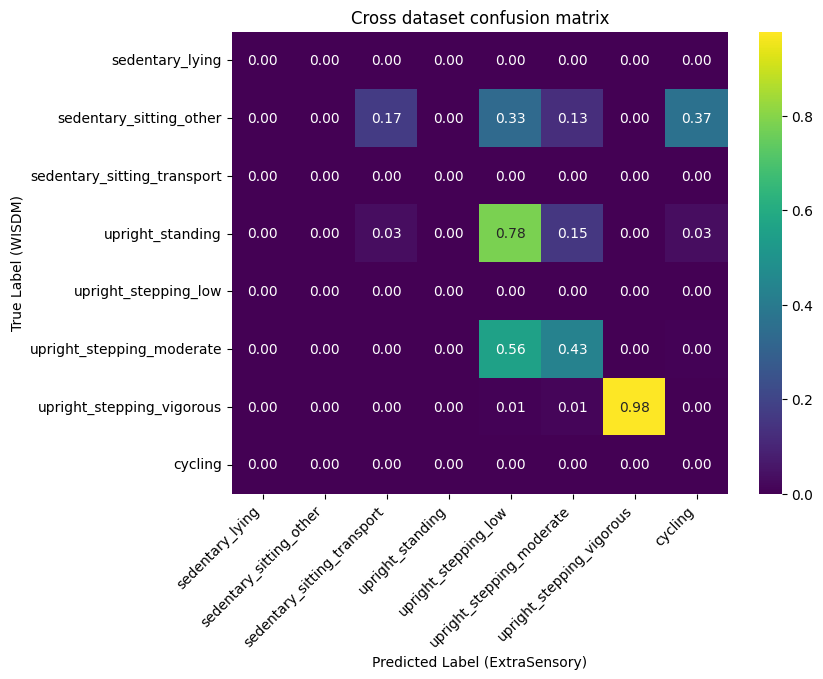

all_labels: ['Lying', 'Sitting', 'Transport', 'Standing', 'Stepping_Low', 'Stepping_Moderate', 'Stepping_Vigorous', 'Cycling']
Confusion Matrix:
[[   0    0    0    0    0    0    0    0]
 [   0    0  267    0  517  200    1  569]
 [   0    0    0    0    0    0    0    0]
 [   0    0   53    0 1211  240    0   49]
 [   0    0    0    0    0    0    0    0]
 [   0    0    5    0  872  672    4    7]
 [   0    0    0    0   11   22 1528    2]
 [   0    0    0    0    0    0    0    0]]



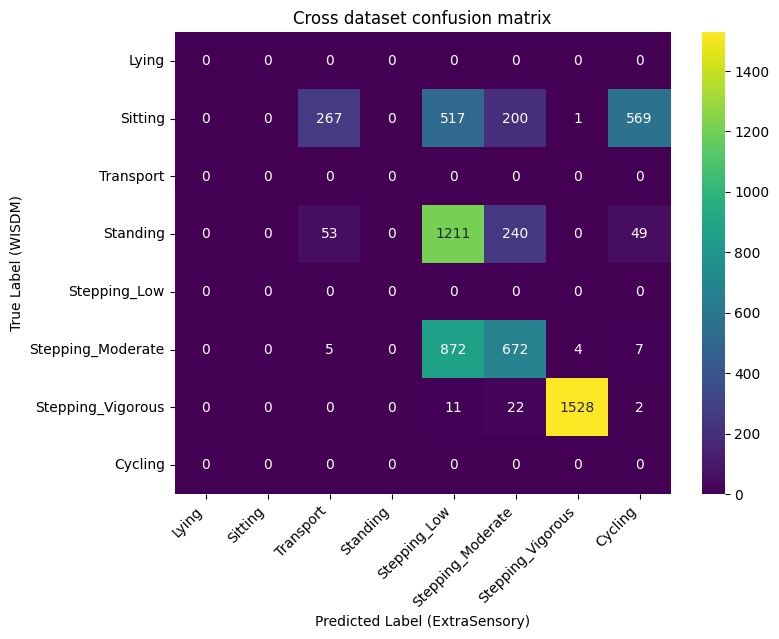

In [33]:
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# print(os.getcwd())
# from data_parsing.Dataset_Label_Mapper import DatasetLabelMapper
def visualize_confusion_matrices_cross_dataset(folder_path, model_label_map_dir, trained_on, evaluated_on):
    # 1️⃣ Load Pretrained Model label mapping
    model_label_mapping_path = os.path.join(model_label_map_dir, "label_mapping.json")
    if not os.path.exists(model_label_mapping_path):
        raise FileNotFoundError(f"label_mapping.json not found in {model_label_map_dir}")
    with open(model_label_mapping_path, "r") as f:
        model_label_mapping = json.load(f)
    
    model_labels = list(model_label_mapping.keys())
    print(f"Pretrained Model Labels({trained_on}): {model_labels}")
    # 1️⃣ Load evaluation dataset label mapping
    label_mapping_path = os.path.join(folder_path, "eval_label_mapping.json")
    if not os.path.exists(label_mapping_path):
        raise FileNotFoundError(f"eval_label_mapping.json not found in {folder_path}")

    with open(label_mapping_path, "r") as f:
        label_mapping = json.load(f)
    
    labels = list(label_mapping.keys())
    print(f"Evaluation Dataset Labels({evaluated_on}): {labels}")
    # reverse the mapping
    label_mapping = {v: k for k, v in label_mapping.items()}
    model_label_mapping = {v: k for k, v in model_label_mapping.items()}
    # load reference mapping
    mapping_path = "/home/hossein/ssl-wearables/conf/cross_dataset_mapping/Activity_label_mapping.json"
    mapper = DatasetLabelMapper(mapping_path)
    if evaluated_on != "ExtraSensory":
        map_eval_ref = mapper.get_mapping(evaluated_on)
    else:
        map_eval_ref = mapper.get_mapping("MyMove")
    print(f"Reference Mapping({evaluated_on}): {map_eval_ref}")
    if trained_on != "ExtraSensory":
        map_train_ref = mapper.get_mapping(trained_on)
    else:
        map_train_ref = mapper.get_mapping("MyMove")
    print(f"Reference Mapping({trained_on}): {map_train_ref}")
    # 2️⃣ Find CSV file with the longest name
    csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]
    if not csv_files:
        raise FileNotFoundError("No CSV files found in the folder.")
    
    
    csv_paths = [os.path.join(folder_path, csv_file) for csv_file in csv_files]
    # for csv_path in csv_paths:
    #     # 3️⃣ Read CSV file and map Y_test,Y_test_pred to model labels
    #     print(f"Processing {csv_path}")
    #     df = pd.read_csv(csv_path)
    #     print(df.head())
    #     if "Y_test" not in df.columns or "Y_test_pred" not in df.columns:
    #         raise KeyError("CSV file does not contain 'Y_test' or 'Y_test_pred' columns.")
    #     df["Y_test"] = df["Y_test"].map(label_mapping) # Map to evaluation dataset labels
    #     df["Y_test_pred"] = df["Y_test_pred"].map(model_label_mapping) # Map to model labels
    #     print(f"Y_test: {df['Y_test'].unique()}")
    #     print(f"Y_test_pred: {df['Y_test_pred'].unique()}")
    #     # 4️⃣ Calculate the pivot table of true and predicted labels
    #     pivot_table = pd.pivot_table(df, index="Y_test", columns="Y_test_pred", aggfunc='size', fill_value=0)
    #     print(f"Pivot Table:\n{pivot_table}\n")
        
    #     # 5️⃣ Plot confusion matrix
    #     plt.figure(figsize=(10, 10))
    #     sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Blues")
    #                 # xticklabels=model_labels, yticklabels=labels)
    #     # 6️⃣ Show plot
    #     plt.xlabel("Predicted Label")
    #     plt.ylabel("True Label")
    #     participant = csv_path.split("/")[-1].split(".")[0]
    #     plt.title(f"Cross dataset pivot table of {participant}")
    #     plt.show()
    
    # combine all csv files and calculate the confusion matrix
    df = pd.concat([pd.read_csv(csv_path) for csv_path in csv_paths], ignore_index=True)
    if "Y_test" not in df.columns or "Y_test_pred" not in df.columns:
        raise KeyError("CSV file does not contain 'Y_test' or 'Y_test_pred' columns.")
    df["Y_test"] = df["Y_test"].map(label_mapping) # Map to evaluation dataset labels
    df["Y_test_pred"] = df["Y_test_pred"].map(model_label_mapping) # Map to model labels
    print(f"label distribution on {evaluated_on}:\n{df['Y_test'].value_counts()}")
    # 4️⃣ Calculate the pivot table
    pivot_table = pd.pivot_table(df, index="Y_test", columns="Y_test_pred", aggfunc='size', fill_value=0)
    print(f"Pivot Table:\n{pivot_table}\n")
    
    # 5️⃣ Plot pivot table
    plt.figure(figsize=(10, 10))
    sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Blues")
    # ticks at 45 degrees 
    # plt.xticks(rotation=60)
                # xticklabels=model_labels, yticklabels=labels)
    # 6️⃣ Show plot
    plt.xlabel(f"Predicted Label ({trained_on})")
    plt.ylabel(f"True Label ({evaluated_on})")
    plt.title(f"Cross dataset pivot table")
    plt.show()

    df["Y_test_pred"] = df["Y_test_pred"].map(map_train_ref) # Map train dataset labels to reference
    df["Y_test"] = df["Y_test"].map(map_eval_ref) # Map eval dataset labels to reference
    Y_true_num = mapper.map_labels_to_numeric(np.array(df["Y_test"]) )
    Y_pred_num = mapper.map_labels_to_numeric(np.array(df["Y_test_pred"] ))
    #remove the labels that are not in the dataset
    unique_pred_labels = np.unique(Y_pred_num)
    #get the labels that are in the dataset
    if trained_on != "ExtraSensory":
        trained_map = mapper.get_label_mapping(trained_on)
    else:
        trained_map = mapper.get_label_mapping("MyMove")
    all_available_labels = list(trained_map.values())
    print(f"all_available_labels: {list(trained_map.keys())}")
    #mask for the pred labels that are not in the trained dataset
    mask = np.isin(Y_true_num, all_available_labels)
    Y_true_num_masked = Y_true_num[mask]
    Y_pred_num_masked = Y_pred_num[mask]
    #confusion matrix for Y_test and Y_test_pred
    cm2 = confusion_matrix(Y_true_num_masked, Y_pred_num_masked,labels = all_available_labels, normalize="true")
    print(f"Confusion Matrix on available labels:\n{cm2}\n")
    fig, ax1 = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm2, annot=True, fmt=".2f", cmap="viridis", ax=ax1)
    # Adjust tick positions to be centered
    ax1.set_xticks(np.arange(len(all_available_labels)) +0.5)
    ax1.set_yticks(np.arange(len(all_available_labels)) +0.5)
    ax1.set_xticklabels(list(trained_map.keys()), rotation=45, ha="right")
    ax1.set_yticklabels(list(trained_map.keys()), rotation=0, va="center")
    plt.xlabel(f"Predicted Label ({trained_on})")
    plt.ylabel(f"True Label ({evaluated_on})")
    plt.title(f"Cross dataset confusion matrix")
    plt.show()


    all_labels = mapper.get_mapping("MyMove")
    #convert values of the all_labels dict to list
    all_labels = list(all_labels.values())
    print(f"all_labels: {all_labels}")

    #confusion matrix for Y_test and Y_test_pred
    cm = confusion_matrix(Y_true_num, Y_pred_num,labels = list(range(len(all_labels))))
    print(f"Confusion Matrix:\n{cm}\n")
    # remove the labels that are not in the dataset 
    
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", ax=ax)
    # Adjust tick positions to be centered
    ax.set_xticks(np.arange(len(all_labels)) +0.5)
    ax.set_yticks(np.arange(len(all_labels)) +0.5)
    ax.set_xticklabels(all_labels, rotation=45, ha="right")
    ax.set_yticklabels(all_labels, rotation=0, va="center")
    plt.xlabel(f"Predicted Label ({trained_on})")
    plt.ylabel(f"True Label ({evaluated_on})")
    plt.title(f"Cross dataset confusion matrix")
    plt.show()
   
   
    
    
    

# Trained on ExtraSensory dataset and evaluated on WISDM dataset
evaluation_result = "/home/hossein/ssl-wearables/data/reports/2025-03-11_14-44"
pretrained_model_label = "/home/hossein/ssl-wearables/data/reports/2025-03-08_05-22"
visualize_confusion_matrices_cross_dataset(evaluation_result, pretrained_model_label, "ExtraSensory","WISDM")


Pretrained Model Labels(WISDM): ['jogging', 'sitting', 'standing', 'walking']
Evaluation Dataset Labels(MyMove): ['cycling', 'sedentary_lying', 'sedentary_sitting_other', 'sedentary_sitting_transport', 'upright_standing', 'upright_stepping_low', 'upright_stepping_moderate', 'upright_stepping_vigorous']
Reference Mapping(MyMove): {'sedentary_lying': 'Lying', 'sedentary_sitting_other': 'Sitting', 'sedentary_sitting_transport': 'Transport', 'upright_standing': 'Standing', 'upright_stepping_low': 'Stepping_Low', 'upright_stepping_moderate': 'Stepping_Moderate', 'upright_stepping_vigorous': 'Stepping_Vigorous', 'cycling': 'Cycling'}
Reference Mapping(WISDM): {'sitting': 'Sitting', 'standing': 'Standing', 'walking': 'Stepping_Moderate', 'jogging': 'Stepping_Vigorous'}
label distribution on MyMove:
sedentary_sitting_other        9907
upright_standing               4946
sedentary_sitting_transport    1726
upright_stepping_low           1153
upright_stepping_moderate       726
sedentary_lying  

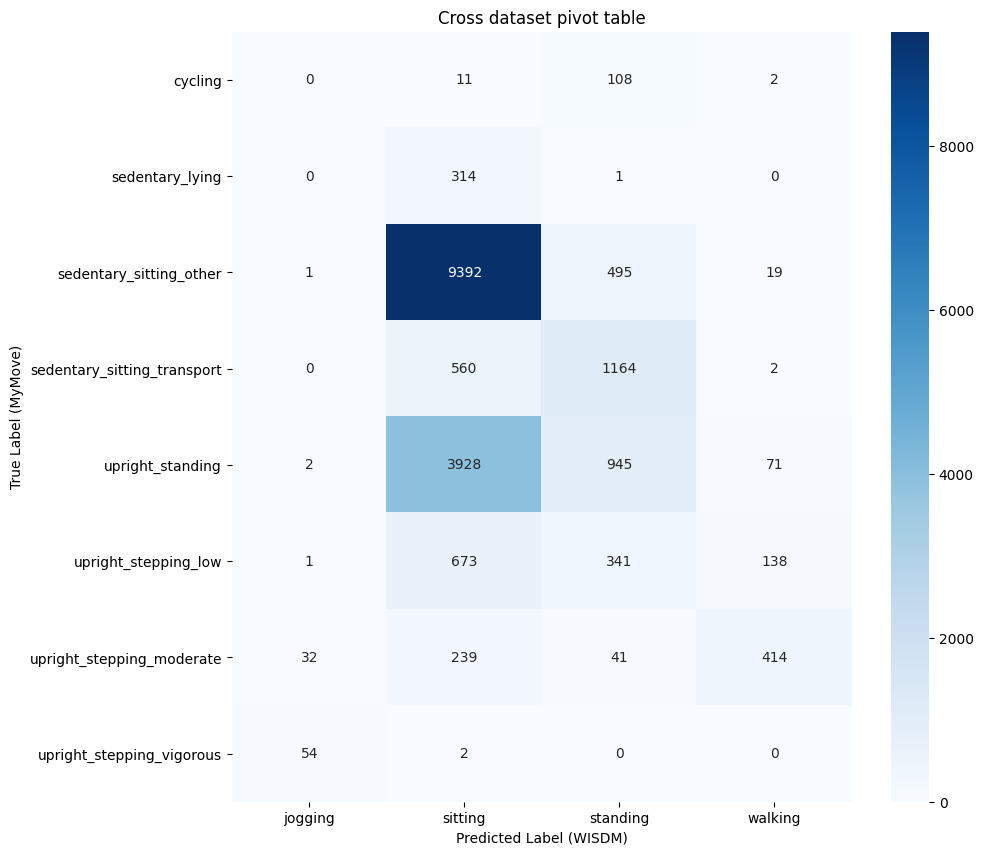

all_available_labels: ['sitting', 'standing', 'walking', 'jogging']
Confusion Matrix on available labels:
[[9.48016554e-01 4.99646714e-02 1.91783587e-03 1.00938730e-04]
 [7.94177113e-01 1.91063486e-01 1.43550344e-02 4.04367165e-04]
 [3.29201102e-01 5.64738292e-02 5.70247934e-01 4.40771350e-02]
 [3.57142857e-02 0.00000000e+00 0.00000000e+00 9.64285714e-01]]



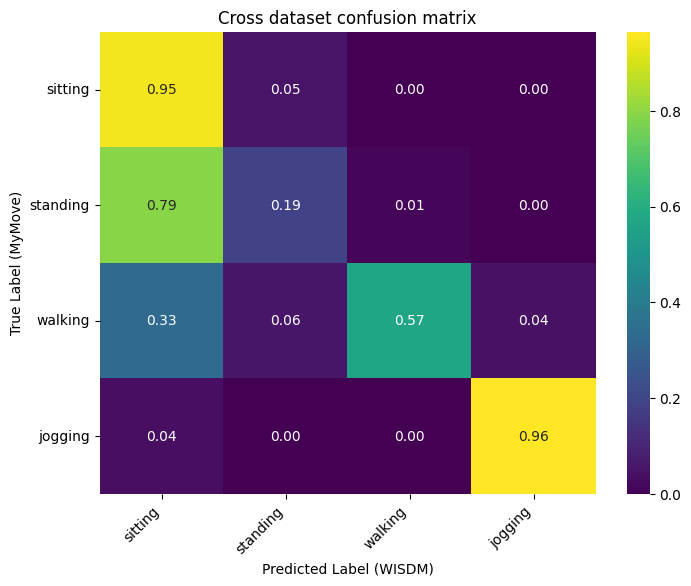

all_labels: ['Lying', 'Sitting', 'Transport', 'Standing', 'Stepping_Low', 'Stepping_Moderate', 'Stepping_Vigorous', 'Cycling']
Confusion Matrix:
[[   0  314    0    1    0    0    0    0]
 [   0 9392    0  495    0   19    1    0]
 [   0  560    0 1164    0    2    0    0]
 [   0 3928    0  945    0   71    2    0]
 [   0  673    0  341    0  138    1    0]
 [   0  239    0   41    0  414   32    0]
 [   0    2    0    0    0    0   54    0]
 [   0   11    0  108    0    2    0    0]]



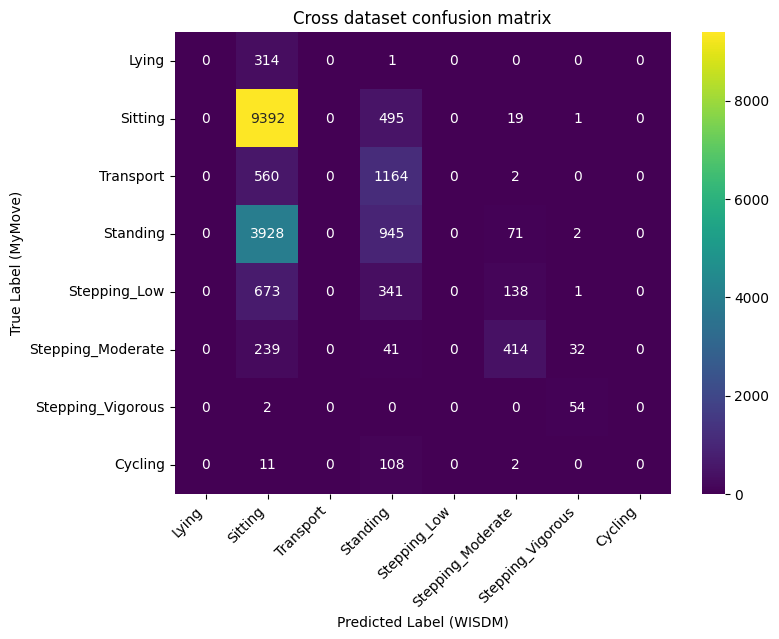

In [34]:
# Trained on WISDM dataset and evaluated on ExtraSensory dataset
evaluation_result = "/home/hossein/ssl-wearables/data/reports/2025-02-19_10-00"
pretrained_model_label = "/home/hossein/ssl-wearables/data/reports/2025-02-18_19-32"
visualize_confusion_matrices_cross_dataset(evaluation_result, pretrained_model_label, "WISDM", "MyMove")

Pretrained Model Labels(ExtraSensory): ['cycling', 'sedentary_lying', 'sedentary_sitting_other', 'sedentary_sitting_transport', 'upright_standing', 'upright_stepping_low', 'upright_stepping_moderate', 'upright_stepping_vigorous']
Evaluation Dataset Labels(MyMove): ['cycling', 'sedentary_lying', 'sedentary_sitting_other', 'sedentary_sitting_transport', 'upright_standing', 'upright_stepping_low', 'upright_stepping_moderate', 'upright_stepping_vigorous']
Reference Mapping(MyMove): {'sedentary_lying': 'Lying', 'sedentary_sitting_other': 'Sitting', 'sedentary_sitting_transport': 'Transport', 'upright_standing': 'Standing', 'upright_stepping_low': 'Stepping_Low', 'upright_stepping_moderate': 'Stepping_Moderate', 'upright_stepping_vigorous': 'Stepping_Vigorous', 'cycling': 'Cycling'}
Reference Mapping(ExtraSensory): {'sedentary_lying': 'Lying', 'sedentary_sitting_other': 'Sitting', 'sedentary_sitting_transport': 'Transport', 'upright_standing': 'Standing', 'upright_stepping_low': 'Stepping_Lo

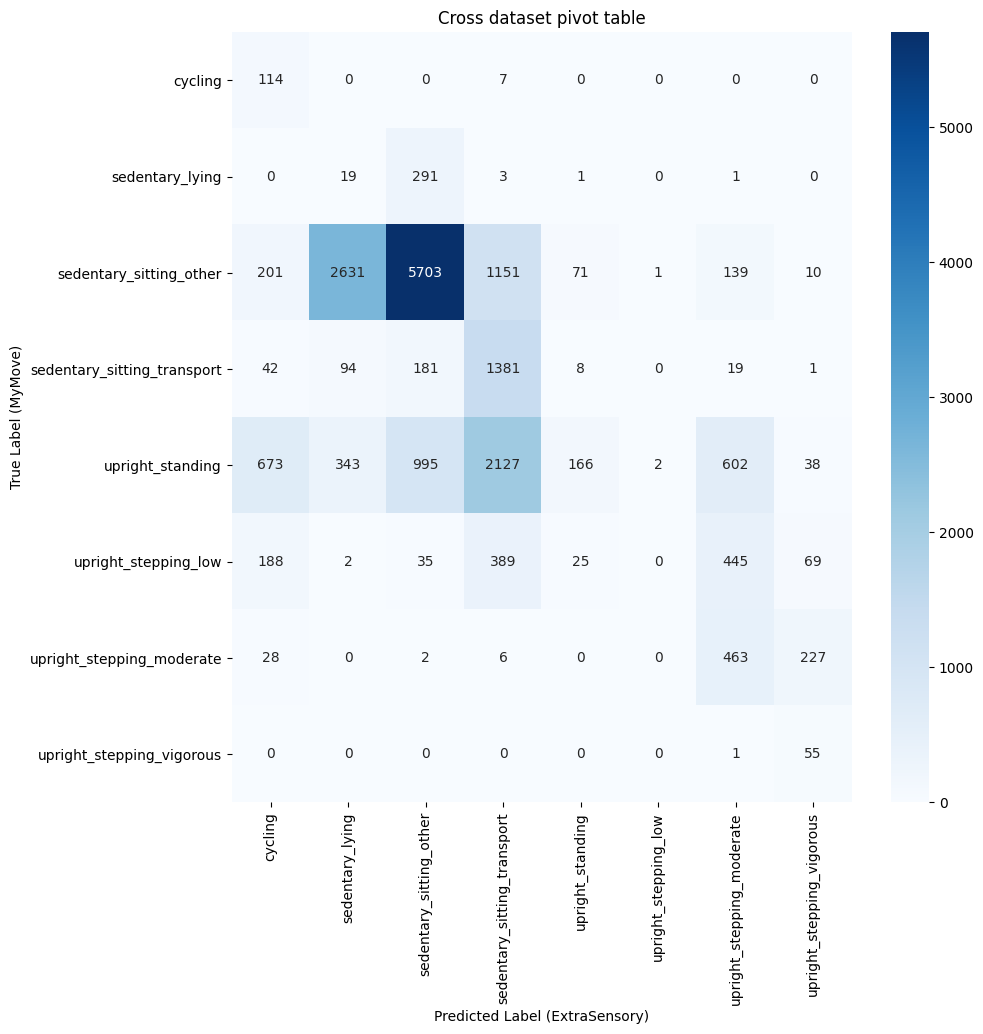

all_available_labels: ['sedentary_lying', 'sedentary_sitting_other', 'sedentary_sitting_transport', 'upright_standing', 'upright_stepping_low', 'upright_stepping_moderate', 'upright_stepping_vigorous', 'cycling']
Confusion Matrix on available labels:
[[6.03174603e-02 9.23809524e-01 9.52380952e-03 3.17460317e-03
  0.00000000e+00 3.17460317e-03 0.00000000e+00 0.00000000e+00]
 [2.65569799e-01 5.75653578e-01 1.16180478e-01 7.16664984e-03
  1.00938730e-04 1.40304835e-02 1.00938730e-03 2.02886848e-02]
 [5.44611819e-02 1.04866744e-01 8.00115875e-01 4.63499421e-03
  0.00000000e+00 1.10081112e-02 5.79374276e-04 2.43337196e-02]
 [6.93489689e-02 2.01172665e-01 4.30044480e-01 3.35624747e-02
  4.04367165e-04 1.21714517e-01 7.68297614e-03 1.36069551e-01]
 [1.73460538e-03 3.03555941e-02 3.37380746e-01 2.16825672e-02
  0.00000000e+00 3.85949696e-01 5.98438855e-02 1.63052905e-01]
 [0.00000000e+00 2.75482094e-03 8.26446281e-03 0.00000000e+00
  0.00000000e+00 6.37741047e-01 3.12672176e-01 3.85674931e-02]

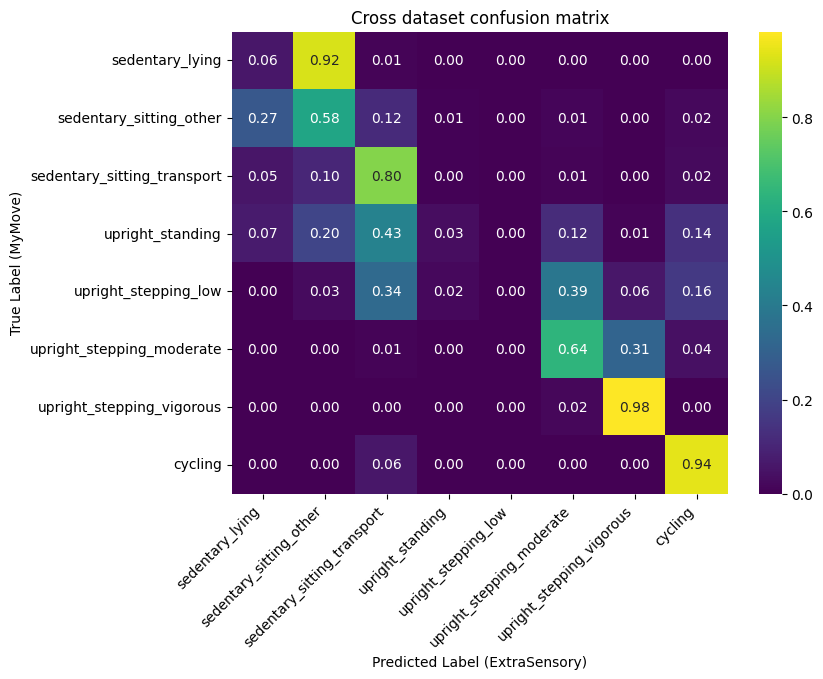

all_labels: ['Lying', 'Sitting', 'Transport', 'Standing', 'Stepping_Low', 'Stepping_Moderate', 'Stepping_Vigorous', 'Cycling']
Confusion Matrix:
[[  19  291    3    1    0    1    0    0]
 [2631 5703 1151   71    1  139   10  201]
 [  94  181 1381    8    0   19    1   42]
 [ 343  995 2127  166    2  602   38  673]
 [   2   35  389   25    0  445   69  188]
 [   0    2    6    0    0  463  227   28]
 [   0    0    0    0    0    1   55    0]
 [   0    0    7    0    0    0    0  114]]



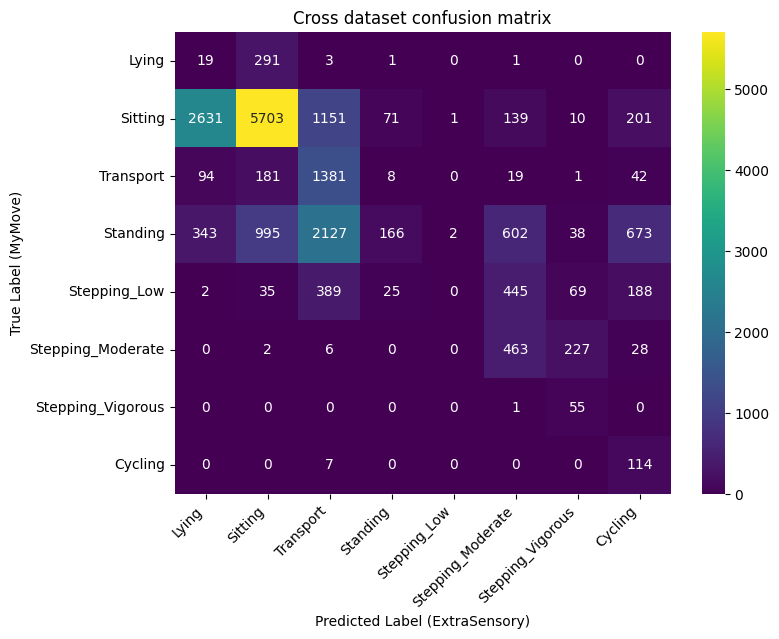

In [35]:
# Trained on ExtraSensory dataset and evaluated on MyMove dataset
evaluation_result = "/home/hossein/ssl-wearables/data/reports/2025-03-08_21-29"
pretrained_model_label = "/home/hossein/ssl-wearables/data/reports/2025-03-08_05-22"
visualize_confusion_matrices_cross_dataset(evaluation_result, pretrained_model_label, "ExtraSensory", "MyMove")

Pretrained Model Labels(WISDM): ['jogging', 'sitting', 'standing', 'walking']
Evaluation Dataset Labels(ExtraSensory): ['cycling', 'sedentary_lying', 'sedentary_sitting_other', 'sedentary_sitting_transport', 'upright_standing', 'upright_stepping_low', 'upright_stepping_moderate', 'upright_stepping_vigorous']
Reference Mapping(ExtraSensory): {'sedentary_lying': 'Lying', 'sedentary_sitting_other': 'Sitting', 'sedentary_sitting_transport': 'Transport', 'upright_standing': 'Standing', 'upright_stepping_low': 'Stepping_Low', 'upright_stepping_moderate': 'Stepping_Moderate', 'upright_stepping_vigorous': 'Stepping_Vigorous', 'cycling': 'Cycling'}
Reference Mapping(WISDM): {'sitting': 'Sitting', 'standing': 'Standing', 'walking': 'Stepping_Moderate', 'jogging': 'Stepping_Vigorous'}
label distribution on ExtraSensory:
sedentary_sitting_other        119929
sedentary_lying                 86073
upright_standing                34442
upright_stepping_moderate       17882
sedentary_sitting_transport

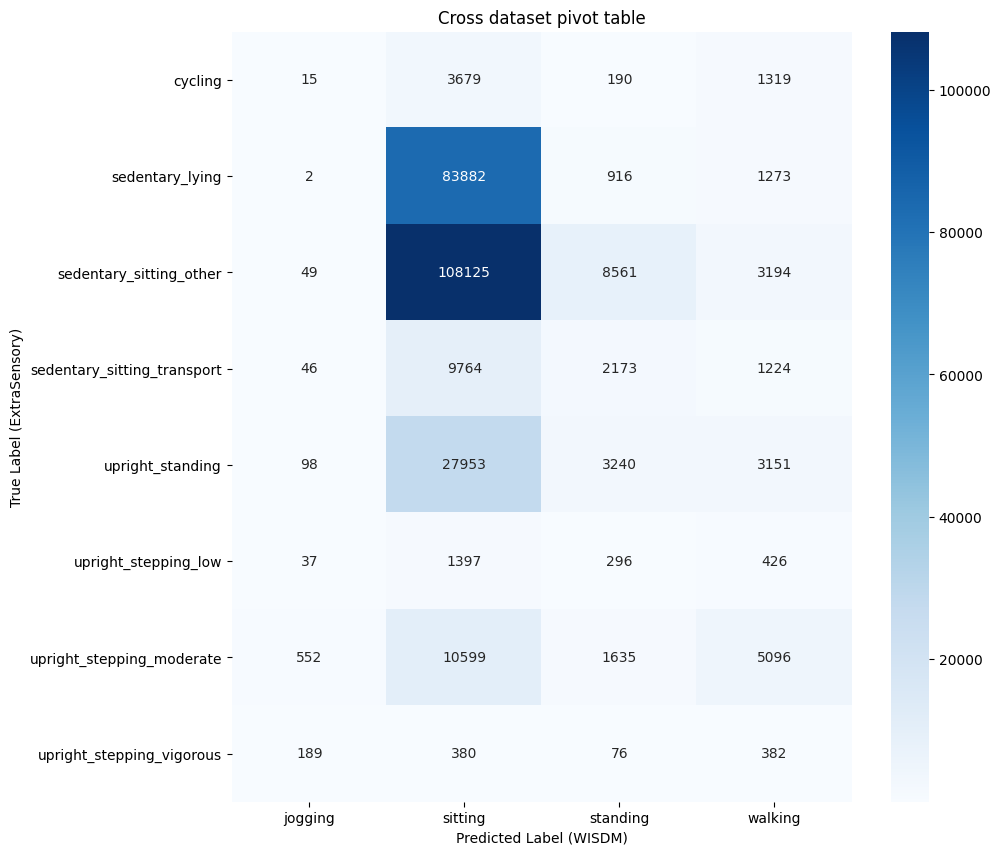

all_available_labels: ['sitting', 'standing', 'walking', 'jogging']
Confusion Matrix on available labels:
[[9.01575099e-01 7.13839021e-02 2.66324242e-02 4.08575074e-04]
 [8.11596307e-01 9.40711921e-02 9.14871378e-02 2.84536322e-03]
 [5.92718935e-01 9.14327256e-02 2.84979309e-01 3.08690303e-02]
 [3.70009737e-01 7.40019474e-02 3.71957157e-01 1.84031159e-01]]



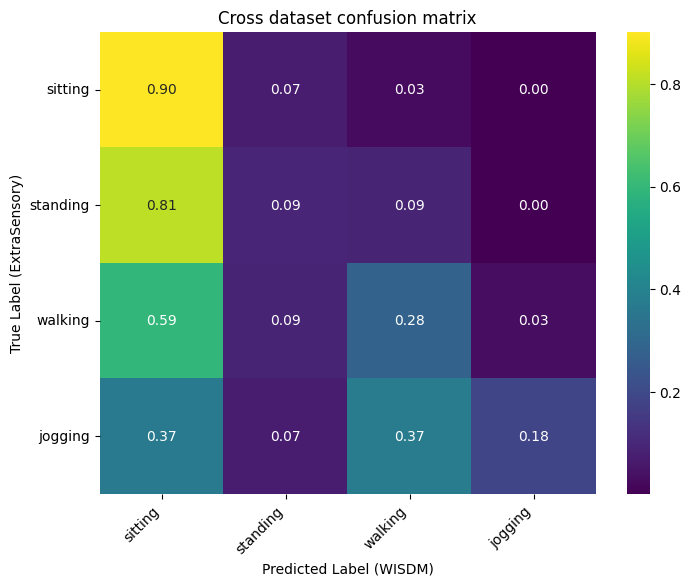

all_labels: ['Lying', 'Sitting', 'Transport', 'Standing', 'Stepping_Low', 'Stepping_Moderate', 'Stepping_Vigorous', 'Cycling']
Confusion Matrix:
[[     0  83882      0    916      0   1273      2      0]
 [     0 108125      0   8561      0   3194     49      0]
 [     0   9764      0   2173      0   1224     46      0]
 [     0  27953      0   3240      0   3151     98      0]
 [     0   1397      0    296      0    426     37      0]
 [     0  10599      0   1635      0   5096    552      0]
 [     0    380      0     76      0    382    189      0]
 [     0   3679      0    190      0   1319     15      0]]



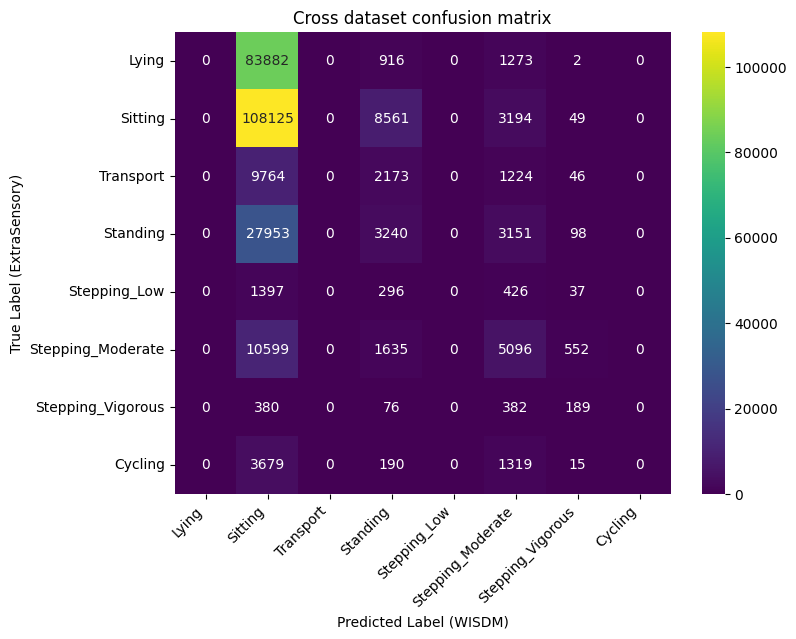

In [36]:
# Trained on WISDM dataset and evaluated on ExtraSensory dataset
evaluation_result = "/home/hossein/ssl-wearables/data/reports/2025-03-13_17-50"
pretrained_model_label = "/home/hossein/ssl-wearables/data/reports/2025-02-18_19-32"
visualize_confusion_matrices_cross_dataset(evaluation_result, pretrained_model_label, "WISDM","ExtraSensory")

## Calculate (and verify) metrics for each results

In [14]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import (
    precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix, accuracy_score
)
from sklearn.preprocessing import label_binarize

def aggregate_results(folder_path):
    all_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]
    metrics_list = []

    for file in all_files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        
        if not {'Y_test', 'Y_test_pred'}.issubset(df.columns):
            print(f"Skipping {file} due to missing columns.")
            continue

        Y_test = df['Y_test'].values
        Y_test_pred = df['Y_test_pred'].values
        probs = df.iloc[:, 3:].values  # Extract probability columns
        
        # Ensure Y_test is binarized correctly for AUC calculation
        classes = np.arange(probs.shape[1])  # Assuming class labels are 0 to N-1
        Y_test_bin = label_binarize(Y_test, classes=classes)
        
        cohen_kappa = cohen_kappa_score(Y_test, Y_test_pred)
        precision = precision_score(Y_test, Y_test_pred, average="macro", zero_division=0)
        recall = recall_score(Y_test, Y_test_pred, average="macro", zero_division=0)
        f1 = f1_score(Y_test, Y_test_pred, average="macro", zero_division=0)
        f1_weighted = f1_score(Y_test, Y_test_pred, average='weighted', zero_division=0)
        conf_matrix = confusion_matrix(Y_test, Y_test_pred)
        
        try:
            auc = roc_auc_score(Y_test_bin, probs, multi_class='ovr')
        except ValueError:
            auc = np.nan  # If AUC cannot be calculated, assign NaN
        
        metrics_list.append({
            "cohen_kappa": cohen_kappa,
            "precision": precision,
            "recall": recall,
            "f1_macro": f1,
            "f1_weighted": f1_weighted,
            "auc": auc
        })
    
    # Convert list of metrics to DataFrame
    results_df = pd.DataFrame(metrics_list)
    
    # Compute mean and std for each metric
    summary = results_df.agg(['mean', 'std']).T
    
    # Save to CSV
    output_csv = os.path.join(folder_path, "metrics_summary.csv")
    summary.to_csv(output_csv)
    print(f"Aggregated results saved to {output_csv}")
    return summary


In [15]:
aggregate_results("/home/hossein/ssl-wearables/data/reports/2025-03-11_14-44")

Skipping results_summary.csv due to missing columns.
Skipping ExtraSensory_all_100k_-1_1.csv due to missing columns.
Aggregated results saved to /home/hossein/ssl-wearables/data/reports/2025-03-11_14-44/metrics_summary.csv


,mean,std
cohen_kappa,-0.015330,0.084991
precision,0.091005,0.067901
recall,0.106532,0.048479
f1_macro,0.083248,0.037064
f1_weighted,0.119322,0.054066
auc,NaN,NaN


In [23]:
def process_folders(csv_file):
    df = pd.read_csv(csv_file)
    result_dir = os.path.dirname(csv_file)
    results = []
    for folder_path in df["path"]:
        folder_path = os.path.join(result_dir, folder_path)
        summary_df = aggregate_results(folder_path).T
        summary_dict = summary_df.to_dict()
        
        row_result = {f"{metric}_{stat}": value for metric, stats in summary_dict.items() for stat, value in stats.items()}
        results.append(row_result)
    
    results_df = pd.DataFrame(results)
    final_df = pd.concat([df, results_df], axis=1)
    # make numbers upto 4 decimal points
    final_df = final_df.round(4)
    new_csv_file = csv_file.replace(".csv", "_with_metrics.csv")
    final_df.to_csv(new_csv_file, index=False)
    return final_df


In [26]:
result_df = process_folders("/home/hossein/ssl-wearables/data/reports/notable_results.csv")

Skipping results_summary.csv due to missing columns.
Skipping ExtraSensory_all_100k_-1_1.csv due to missing columns.
Skipping metrics_summary.csv due to missing columns.
Aggregated results saved to /home/hossein/ssl-wearables/data/reports/2025-03-11_14-44/metrics_summary.csv
Skipping wisdm_all_100k_-1_1.csv due to missing columns.
Skipping metrics_summary.csv due to missing columns.
Aggregated results saved to /home/hossein/ssl-wearables/data/reports/2025-03-13_17-50/metrics_summary.csv
Skipping metrics_summary.csv due to missing columns.
Aggregated results saved to /home/hossein/ssl-wearables/data/reports/2025-02-19_10-00/metrics_summary.csv
Skipping ExtraSensory_all_100k_-1_1.csv due to missing columns.
Skipping metrics_summary.csv due to missing columns.
Aggregated results saved to /home/hossein/ssl-wearables/data/reports/2025-03-08_21-16/metrics_summary.csv
Skipping ExtraSensory_all_100k_-1_1.csv due to missing columns.
Skipping metrics_summary.csv due to missing columns.
Aggregate

### Convert retults to latex

In [27]:
result_df.columns

Index(['path', 'trained_dataset', 'evaluated_dataset', 'validation', 'split',
       'conditions', 'comments', 'freeze_weight', 'cohen_kappa_mean',
       'cohen_kappa_std', 'precision_mean', 'precision_std', 'recall_mean',
       'recall_std', 'f1_macro_mean', 'f1_macro_std', 'f1_weighted_mean',
       'f1_weighted_std', 'auc_mean', 'auc_std'],
      dtype='object')

In [30]:
result_df.dtypes

path                  object
trained_dataset       object
evaluated_dataset     object
validation            object
split                 object
conditions            object
comments              object
freeze_weight         object
cohen_kappa_mean     float64
cohen_kappa_std      float64
precision_mean       float64
precision_std        float64
recall_mean          float64
recall_std           float64
f1_macro_mean        float64
f1_macro_std         float64
f1_weighted_mean     float64
f1_weighted_std      float64
auc_mean             float64
auc_std              float64
dtype: object

In [55]:
def generate_latex_commands(df, output_dir):
    # Shorten dataset names using a predefined dictionary
    dataset_dict = {
        'ExtSens_10s' : 'ES8c',
        'mymove_10s' : 'MM8c',
        'mymove_10s_5c' : 'MM5c',
        'wisdm_10s_few_class' : 'WISDM4c',
        # Add more dataset abbreviations as needed
    }
    
    # Shorten validation types using another predefined dictionary
    validation_dict = {
        'cross-user': 'CU',
        'cross-domain': 'CDM',
        'cross-dataset': 'CDS',
        'personalization': 'Pers',
        # Add more validation types if necessary
    }
    
    # Initialize a dictionary to store LaTeX commands by validation type
    latex_commands = {
        'CU': [],
        'CDM': [],
        'CDS': [],
        'Pers': [],
    }
    # sort dataframe based on validation, trained_dataset, evaluated_dataset, split, path
    df = df.sort_values(by=["validation", "trained_dataset", "evaluated_dataset", "split", "path"], ascending=[True, True, True, True, False])
    print("sorted df",df)
    # for each validation, trained_dataset, evaluated_dataset, split select the most recent result (path are dates and time)
    df = df.groupby(["validation", "trained_dataset", "evaluated_dataset", "split"]).head(1)
    print("only latest df",df)
    for _, row in df.iterrows():
        # Shorten the dataset and validation names
        trained_dataset = dataset_dict.get(row['trained_dataset'], row['trained_dataset'])
        evaluated_dataset = dataset_dict.get(row['evaluated_dataset'], row['evaluated_dataset'])
        validation = validation_dict.get(row['validation'], row['validation'])
        
        # Replace "%" in the "split" column with "p"
        split = str(row['split']).replace('%', 'p')
        
        # Define the metrics
        metrics = ['cohen_kappa', 'precision', 'recall', 'f1_macro', 'f1_weighted', 'auc']
        
        # Iterate over the metrics and generate LaTeX commands
        for metric in metrics:
            for stat in ['mean', 'std']:
                metric_stat = f"{metric}_{stat}"
                value = row[metric_stat]
                
                # Create the LaTeX command
                if validation == 'CU':
                    if split == 'None' or str(split) == 'nan':
                        command = f"\\newcommand{{\\{validation}_{trained_dataset}_{metric}_{stat}}}{{{value}}} % {row['path']}"
                    else:
                        command = f"\\newcommand{{\\{validation}_{trained_dataset}_{split}_{metric}_{stat}}}{{{value}}} % {row['path']}"
                else:
                    if split == 'None' or split == 'nan':
                        command = f"\\newcommand{{\\{validation}_{trained_dataset}_{evaluated_dataset}_{metric}_{stat}}}{{{value}}} % {row['path']}"
                    else:
                        command = f"\\newcommand{{\\{validation}_{trained_dataset}_{evaluated_dataset}_{split}_{metric}_{stat}}}{{{value}}} % {row['path']}"

                
                # Append to the appropriate validation type
                latex_commands[validation].append(command)
    
    # Write LaTeX commands to separate files based on validation type
    for validation_type, commands in latex_commands.items():
        with open(os.path.join(output_dir, f"latex_commands_{validation_type}.tex"), 'w') as f:
            f.write("\n".join(commands))
    
    print("LaTeX commands generated and saved to files.")

# Example usage
# Assuming 'df' is your DataFrame containing the results
# df = pd.read_csv("your_results.csv")
# generate_latex_commands(df)

In [56]:
generate_latex_commands(result_df, "/home/hossein/ssl-wearables/data/reports/")

sorted df                 path      trained_dataset    evaluated_dataset  \
0   2025-03-11_14-44          ExtSens_10s  wisdm_10s_few_class   
1   2025-03-13_17-50  wisdm_10s_few_class          ExtSens_10s   
6   2025-03-08_21-29          ExtSens_10s           mymove_10s   
5   2025-03-08_21-25          ExtSens_10s           mymove_10s   
4   2025-03-08_21-20          ExtSens_10s           mymove_10s   
3   2025-03-08_21-16          ExtSens_10s           mymove_10s   
7   2025-03-10_16-55  wisdm_10s_few_class           mymove_10s   
2   2025-02-19_10-00  wisdm_10s_few_class           mymove_10s   
8   2025-03-10_17-00  wisdm_10s_few_class        mymove_10s_5c   
10  2025-03-08_05-22          ExtSens_10s          ExtSens_10s   
11  2025-03-10_17-07  wisdm_10s_few_class  wisdm_10s_few_class   
9   2025-02-18_19-32  wisdm_10s_few_class  wisdm_10s_few_class   
15  2025-03-24_17-47        mymove_10s_5c        mymove_10s_5c   
16  2025-03-24_17-53        mymove_10s_5c        mymove_10s_5c   
